# Micro-Credit Defaulter Model

### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


In [434]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [435]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [436]:
#loading the dataset
df=pd.read_csv('Data file.csv')
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90 pcircle       pdate
0                1      0  21408I70789   272.0   3055.050000   3065.150000    220.13    260.13                2.0                0.0              1539              2          21.0             3078.0                1539.0                  7.50              2            21               3078                1539.0                  7.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0  29.000000  29.000000     UPW  2016-07-20
1                2      1  76462I70374   712.0  12122.000000  12124.750000   3691.26   3691.26               20.0                0.0              5787              1           0.0             5787.0                5787.0                 61.04              1             0               5787                5787.0                 61.04            0.0           0.0              0             0            1            12             12.0                 0.0          1.0            12               12                 0.0   0.000000   0.000000     UPW  2016-08-10
2                3      1  17943I70372   535.0   1398.000000   1398.000000    900.13    900.13                3.0                0.0              1539              1           0.0             1539.0                1539.0                 66.32              1             0               1539                1539.0                 66.32            0.0           0.0              0             0            1             6              6.0                 0.0          1.0             6                6                 0.0   0.000000   0.000000     UPW  2016-08-19
3                4      1  55773I70781   241.0     21.228000     21.228000    159.42    159.42               41.0                0.0               947              0           0.0                0.0                   0.0                  0.00              1             0                947                 947.0                  2.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0   0.000000   0.000000     UPW  2016-06-06
4                5      1  03813I82730   947.0    150.619333    150.619333   1098.90   1098.90                4.0                0.0              2309              7           2.0            20029.0                2309.0                 29.00              8             2              23496                2888.0                 35.00            0.0           0.0              0             0            7            42              6.0                 0.0          7.0            42                6                 0.0   2.333333   2.333333     UPW  2016-06-22
...            ...    ...          ...     ...           ...           ...       ...       ...                ...                ...               ...            ...           ...                ...                   ...                   ...            ...           ...                ...                   ...                   ...            ...           ...            ...           ...          ...           ...              ...                 ...          ...           ...              ...                 ...        ...        ...     ...         ...
209588      209589      1  22758I85348   404.0    151.872333    151

In [437]:
#We can see that the Unnamed is just the index number so we can drop that column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [438]:
df.shape    #Checking the dimensions of the dataset

(209593, 36)

Thus there are 209593 rows and 36 columns 

In [439]:
df.columns #shows columns name

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'pcircle', 'pdate'], dtype='object')

### Data Description

1.label:Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

2.msisdn:mobile number of user

3.aon:age on cellular network in days

4.daily_decr30:Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

5.daily_decr90:Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

6.rental30:Average main account balance over last 30 days

7.rental90:Average main account balance over last 90 days

8.last_rech_date_ma:Number of days till last recharge of main account

9.last_rech_date_da:Number of days till last recharge of data account

10.last_rech_amt_ma:Amount of last recharge of main account (in Indonesian Rupiah)

11.cnt_ma_rech30:Number of times main account got recharged in last 30 days

12.fr_ma_rech30:Frequency of main account recharged in last 30 days

13.sumamnt_ma_rech30:Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

14.medianamnt_ma_rech30:Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

15.medianmarechprebal30:Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

16.cnt_ma_rech90:Number of times main account got recharged in last 90 days

17.fr_ma_rech90:Frequency of main account recharged in last 90 days

18.sumamnt_ma_rech90:Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

19.medianamnt_ma_rech90:Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

20.medianmarechprebal90:Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

21.cnt_da_rech30:Number of times data account got recharged in last 30 days

22.fr_da_rech30:Frequency of data account recharged in last 30 days

23.cnt_da_rech90:Number of times data account got recharged in last 90 days

24.fr_da_rech90:Frequency of data account recharged in last 90 days

25.cnt_loans30:Number of loans taken by user in last 30 days

26.amnt_loans30:Total amount of loans taken by user in last 30 days

27.maxamnt_loans30:maximum amount of loan taken by the user in last 30 days

28.medianamnt_loans30:Median of amounts of loan taken by the user in last 30 days

29.cnt_loans90:Number of loans taken by user in last 90 days

30.amnt_loans90:Total amount of loans taken by user in last 90 days

31.maxamnt_loans90:maximum amount of loan taken by the user in last 90 days

32.medianamnt_loans90:Median of amounts of loan taken by the user in last 90 days

33.payback30:Average payback time in days over last 30 days

34.payback90:Average payback time in days over last 90 days

35.pcircle:telecom circle

36.pdate:date

In [440]:
df.info() #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Thus we see that pcircle ,pdate adn msisdn are object datatype and rest are either int type or float type.

### converting pdate to datatime stamp

In [441]:
df['pdate'] = pd.to_datetime(df['pdate']) #converting pdate to datetime stamp.

### checking for null values

In [442]:
df.isnull().sum()   #Checking for null values in the dataset

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

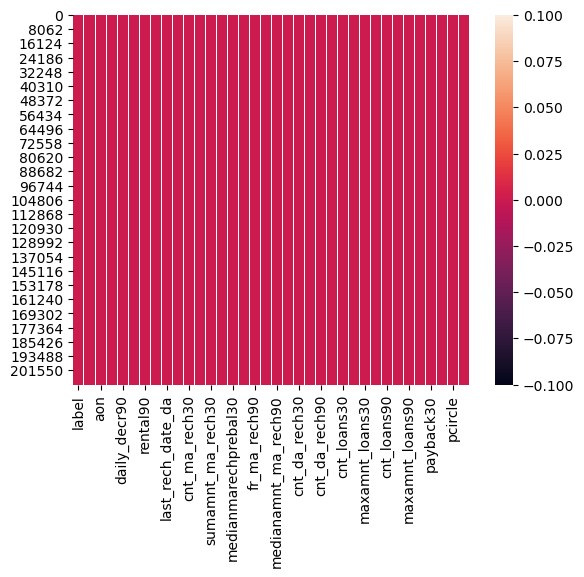

In [443]:
sns.heatmap(df.isnull()) 

We can see that there are no null values present in the given dataset

### converting the date columns into day ,month, year for further analysis

In [444]:
df['month']=df['pdate'].dt.month_name()
df['day']=df['pdate'].dt.day
df['year']=df['pdate'].dt.year

In [445]:
#checking the values counts for year 
df['year'].value_counts()

2016    209593
Name: year, dtype: int64

thus we see all the records contain 2016 as year so we will drop this column.

In [446]:
df.drop(['year'],axis=1,inplace=True)

In [447]:
#Checking the value count for day column
df['day'].value_counts()

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: day, dtype: int64

In [448]:
#Checking the value count for month column
df['month'].value_counts()

July      85765
June      83154
August    40674
Name: month, dtype: int64

In [449]:
df.drop(['pdate'],axis=1,inplace=True)

In [450]:
df

label       msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90 pcircle   month  day
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13    260.13                2.0                0.0              1539              2          21.0             3078.0                1539.0                  7.50              2            21               3078                1539.0                  7.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0  29.000000  29.000000     UPW    July   20
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   3691.26               20.0                0.0              5787              1           0.0             5787.0                5787.0                 61.04              1             0               5787                5787.0                 61.04            0.0           0.0              0             0            1            12             12.0                 0.0          1.0            12               12                 0.0   0.000000   0.000000     UPW  August   10
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13    900.13                3.0                0.0              1539              1           0.0             1539.0                1539.0                 66.32              1             0               1539                1539.0                 66.32            0.0           0.0              0             0            1             6              6.0                 0.0          1.0             6                6                 0.0   0.000000   0.000000     UPW  August   19
3           1  55773I70781   241.0     21.228000     21.228000    159.42    159.42               41.0                0.0               947              0           0.0                0.0                   0.0                  0.00              1             0                947                 947.0                  2.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0   0.000000   0.000000     UPW    June    6
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   1098.90                4.0                0.0              2309              7           2.0            20029.0                2309.0                 29.00              8             2              23496                2888.0                 35.00            0.0           0.0              0             0            7            42              6.0                 0.0          7.0            42                6                 0.0   2.333333   2.333333     UPW    June   22
...       ...          ...     ...           ...           ...       ...       ...                ...                ...               ...            ...           ...                ...                   ...                   ...            ...           ...                ...                   ...                   ...            ...           ...            ...           ...          ...           ...              ...                 ...          ...           ...              ...                 ...        ...        ...     ...     ...  ...
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   1089.19                1.0                0.0              4048      

In [451]:
df['pcircle'].value_counts

<bound method IndexOpsMixin.value_counts of 0         UPW
1         UPW
2         UPW
3         UPW
4         UPW
         ... 
209588    UPW
209589    UPW
209590    UPW
209591    UPW
209592    UPW
Name: pcircle, Length: 209593, dtype: object>

thus we that pcircle is having UPW as one recors for all the rows so we can drop this column.

In [452]:
df.drop(['pcircle'],axis=1,inplace=True)

In [453]:
df.head(5) #validating the dataset 

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90   month  day
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13                2.0                0.0              1539              2          21.0             3078.0                1539.0                  7.50              2            21               3078                1539.0                  7.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0  29.000000  29.000000    July   20
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0                0.0              5787              1           0.0             5787.0                5787.0                 61.04              1             0               5787                5787.0                 61.04            0.0           0.0              0             0            1            12             12.0                 0.0          1.0            12               12                 0.0   0.000000   0.000000  August   10
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13                3.0                0.0              1539              1           0.0             1539.0                1539.0                 66.32              1             0               1539                1539.0                 66.32            0.0           0.0              0             0            1             6              6.0                 0.0          1.0             6                6                 0.0   0.000000   0.000000  August   19
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42               41.0                0.0               947              0           0.0                0.0                   0.0                  0.00              1             0                947                 947.0                  2.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0   0.000000   0.000000    June    6
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90                4.0                0.0              2309              7           2.0            20029.0                2309.0                 29.00              8             2              23496                2888.0                 35.00            0.0           0.0              0             0            7            42              6.0                 0.0          7.0            42                6                 0.0   2.333333   2.333333    June   22

In [454]:
df.duplicated().sum()

1

In [455]:
df.drop_duplicates()

label       msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90   month  day
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13    260.13                2.0                0.0              1539              2          21.0             3078.0                1539.0                  7.50              2            21               3078                1539.0                  7.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0  29.000000  29.000000    July   20
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   3691.26               20.0                0.0              5787              1           0.0             5787.0                5787.0                 61.04              1             0               5787                5787.0                 61.04            0.0           0.0              0             0            1            12             12.0                 0.0          1.0            12               12                 0.0   0.000000   0.000000  August   10
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13    900.13                3.0                0.0              1539              1           0.0             1539.0                1539.0                 66.32              1             0               1539                1539.0                 66.32            0.0           0.0              0             0            1             6              6.0                 0.0          1.0             6                6                 0.0   0.000000   0.000000  August   19
3           1  55773I70781   241.0     21.228000     21.228000    159.42    159.42               41.0                0.0               947              0           0.0                0.0                   0.0                  0.00              1             0                947                 947.0                  2.50            0.0           0.0              0             0            2            12              6.0                 0.0          2.0            12                6                 0.0   0.000000   0.000000    June    6
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   1098.90                4.0                0.0              2309              7           2.0            20029.0                2309.0                 29.00              8             2              23496                2888.0                 35.00            0.0           0.0              0             0            7            42              6.0                 0.0          7.0            42                6                 0.0   2.333333   2.333333    June   22
...       ...          ...     ...           ...           ...       ...       ...                ...                ...               ...            ...           ...                ...                   ...                   ...            ...           ...                ...                   ...                   ...            ...           ...            ...           ...          ...           ...              ...                 ...          ...           ...              ...                 ...        ...        ...     ...  ...
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   1089.19                1.0                0.0              4048              3           2.0            10404.0              

In [456]:
df.describe().T #it provides statistical information about the numerical datatypes.

count          mean           std           min       25%          50%       75%            max
label                 209593.0      0.875177      0.330519      0.000000     1.000     1.000000      1.00       1.000000
aon                   209593.0   8112.343445  75696.082531    -48.000000   246.000   527.000000    982.00  999860.755168
daily_decr30          209593.0   5381.402289   9220.623400    -93.012667    42.440  1469.175667   7244.00  265926.000000
daily_decr90          209593.0   6082.515068  10918.812767    -93.012667    42.692  1500.000000   7802.79  320630.000000
rental30              209593.0   2692.581910   4308.586781 -23737.140000   280.420  1083.570000   3356.94  198926.110000
rental90              209593.0   3483.406534   5770.461279 -24720.580000   300.260  1334.000000   4201.79  200148.110000
last_rech_date_ma     209593.0   3755.847800  53905.892230    -29.000000     1.000     3.000000      7.00  998650.377733
last_rech_date_da     209593.0   3712.202921  53374.833430    -29.000000     0.000     0.000000      0.00  999171.809410
last_rech_amt_ma      209593.0   2064.452797   2370.786034      0.000000   770.000  1539.000000   2309.00   55000.000000
cnt_ma_rech30         209593.0      3.978057      4.256090      0.000000     1.000     3.000000      5.00     203.000000
fr_ma_rech30          209593.0   3737.355121  53643.625172      0.000000     0.000     2.000000      6.00  999606.368132
sumamnt_ma_rech30     209593.0   7704.501157  10139.621714      0.000000  1540.000  4628.000000  10010.00  810096.000000
medianamnt_ma_rech30  209593.0   1812.817952   2070.864620      0.000000   770.000  1539.000000   1924.00   55000.000000
medianmarechprebal30  209593.0   3851.927942  54006.374433   -200.000000    11.000    33.900000     83.00  999479.419319
cnt_ma_rech90         209593.0      6.315430      7.193470      0.000000     2.000     4.000000      8.00     336.000000
fr_ma_rech90          209593.0      7.716780     12.590251      0.000000     0.000     2.000000      8.00      88.000000
sumamnt_ma_rech90     209593.0  12396.218352  16857.793882      0.000000  2317.000  7226.000000  16000.00  953036.000000
medianamnt_ma_rech90  209593.0   1864.595821   2081.680664      0.000000   773.000  1539.000000   1924.00   55000.000000
medianmarechprebal90  209593.0     92.025541    369.215658   -200.000000    14.600    36.000000     79.31   41456.500000
cnt_da_rech30         209593.0    262.578110   4183.897978      0.000000     0.000     0.000000      0.00   99914.441420
fr_da_rech30          209593.0   3749.494447  53885.414979      0.000000     0.000     0.000000      0.00  999809.240107
cnt_da_rech90         209593.0      0.041495      0.397556      0.000000     0.000     0.000000      0.00      38.000000
fr_da_rech90          209593.0      0.045712      0.951386      0.000000     0.000     0.000000      0.00      64.000000
cnt_loans30           209593.0      2.758981      2.554502      0.000000     1.000     2.000000      4.00      50.000000
amnt_loans30          209593.0     17.952021     17.379741      0.000000     6.000    12.000000     24.00     306.000000
maxamnt_loans30       209593.0    274.658747   4245.264648      0.000000     6.000     6.000000      6.00   99864.560864
medianamnt_loans30    209593.0      0.054029      0.218039      0.000000     0.000     0.000000      0.00       3.000000
cnt_loans90           209593.0     18.520919    224.797423      0.000000     1.000     2.000000      5.00    4997.517944
amnt_loans90          209593.0     23.645398     26.469861      0.000000     6.000    12.000000     30.00     438.000000
maxamnt_loans90       209593.0      6.703134      2.103864      0.000000     6.000     6.000000      6.00      12.000000
medianamnt_loans90    209593.0      0.046077      0.200692      0.000000     0.000     0.000000      0.00       3.000000
payback30             209593.0      3.398826      8.813729      0.000000     0.000     0.000000      3.75     171.500000
payback90             209593.0  

Observation:

1.Most of the columns mean is greater than median which means that it is positively skewed distribution. 

2.Most of the columns min value is 0.

3.Thus we see there is high gap between the max and 75% which shows the presence of outliers.

### Converting negative values into positive values

In [457]:
col1=['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da','medianmarechprebal30','medianmarechprebal90']

In [458]:
df[col1]=df[col1].apply(abs)

In [459]:
df.isin([0]).sum().sort_values(ascending=False) #checking which are the columns having 0 values maximum

fr_da_rech90            208728
fr_da_rech30            208014
cnt_da_rech30           205479
cnt_da_rech90           204226
last_rech_date_da       202861
medianamnt_loans90      197424
medianamnt_loans30      195445
payback30               106712
payback90                95699
fr_ma_rech30             78683
fr_ma_rech90             65753
medianmarechprebal30     30680
cnt_ma_rech30            27979
sumamnt_ma_rech30        27979
medianamnt_ma_rech30     27979
label                    26162
medianmarechprebal90     23391
last_rech_amt_ma         20995
medianamnt_ma_rech90     20950
cnt_ma_rech90            20950
sumamnt_ma_rech90        20950
last_rech_date_ma        20743
rental30                  7566
rental90                  6918
daily_decr30              4144
daily_decr90              4063
cnt_loans30               3259
amnt_loans30              3259
maxamnt_loans30           3244
amnt_loans90              2043
maxamnt_loans90           2043
cnt_loans90               2036
month   

In [460]:
df.nunique().to_frame("Unique Values") #gives all the distinct values of all the columns

Unique Values
label                             2
msisdn                       186243
aon                            4499
daily_decr30                 146597
daily_decr90                 158245
rental30                     129745
rental90                     138712
last_rech_date_ma              1157
last_rech_date_da              1163
last_rech_amt_ma                 70
cnt_ma_rech30                    71
fr_ma_rech30                   1083
sumamnt_ma_rech30             15141
medianamnt_ma_rech30            510
medianmarechprebal30          29634
cnt_ma_rech90                   110
fr_ma_rech90                     89
sumamnt_ma_rech90             31771
medianamnt_ma_rech90            608
medianmarechprebal90          28957
cnt_da_rech30                  1066
fr_da_rech30                   1072
cnt_da_rech90                    27
fr_da_rech90                     46
cnt_loans30                      40
amnt_loans30                     48
maxamnt_loans30                1050
medianamnt_loans30                6
cnt_loans90                    1110
amnt_loans90                     69
maxamnt_loans90                   3
medianamnt_loans90                6
payback30                      1363
payback90                      2381
month                             3
day                              31

Thus we see that these fr_da_rech90,fr_da_rech30,cnt_da_rech30,cnt_da_rech90,last_rech_date_da,medianamnt_loans90,medianamnt_loans30 accounts for more than 90% of the data having 0 values which is iirelevant for model training
as it contains 0 values so we may drop it.

In [461]:
# Dropping columns having more than 90% of zero values
df.drop(columns=["fr_da_rech90","fr_da_rech30","cnt_da_rech30","cnt_da_rech90","last_rech_date_da","medianamnt_loans90","medianamnt_loans30"],axis=1,inplace=True)

In [462]:
# description of the categorcal features
df.describe(include=np.object)

msisdn   month
count        209593  209593
unique       186243       3
top     04581I85330    July
freq              7   85765

### Splitting data into categorical column and numerical column

In [463]:
non_obj=df.select_dtypes('number').columns.to_list()
obj=df.select_dtypes('object').columns.to_list()

In [464]:
non_obj

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'payback30',
 'payback90',
 'day']

In [465]:
obj

['msisdn', 'month']

# Univariate Analysis

### Univariate Analysis for categorical columns

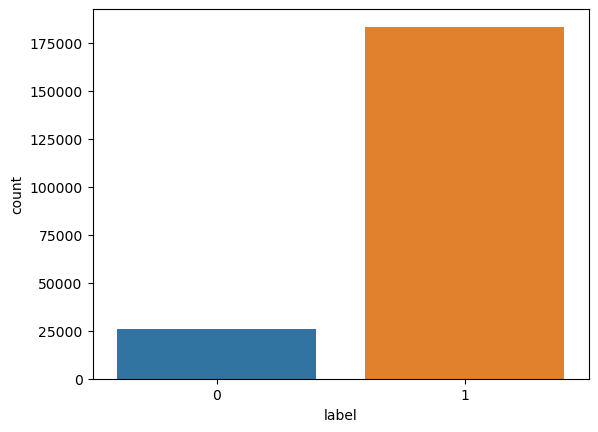

1    183431
0     26162
Name: label, dtype: int64


In [466]:
sns.countplot(x='label', data=df)  #Plotting the attrition rate  using countplot
plt.show()
print(df['label'].value_counts())

Thus we see that there are 87.5% consist of label' 1'  which indicates that the loan has been payed i.e. Non- defaulter 
 while and rest consist of label '0' indicates that the loan has not been payed i.e. defaulter .Thus this dataset is showing significantly unbalanced data , we will using smote technique to baalnce it later.

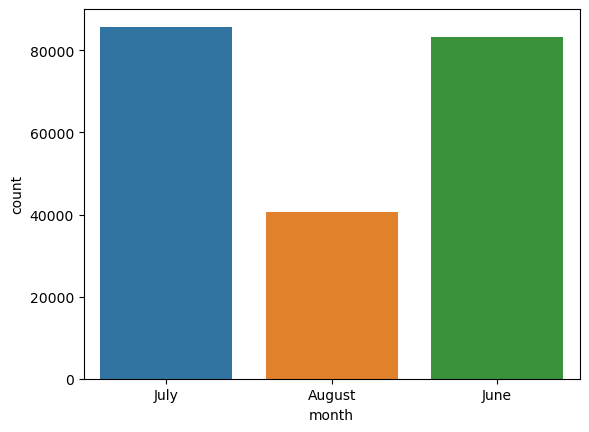

July      85765
June      83154
August    40674
Name: month, dtype: int64


In [467]:
sns.countplot(x='month', data=df)  
plt.show()
print(df['month'].value_counts())

Thus we see that maximum number of records are found in the month of July followed by June and least is August.We see these three months
where records can be found.

### Univariate Analysis for continuous columns

In [468]:
for i in df[non_obj]:
        print(df[non_obj][i].value_counts())
     

1    183431
0     26162
Name: label, dtype: int64
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
603666.669107      1
852238.900959      1
851325.512514      1
680080.580059      1
701743.387268      1
Name: aon, Length: 4499, dtype: int64
0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
32.615333         1
17.475333         1
6805.494000       1
776.195000        1
8025.668000       1
Name: daily_decr30, Length: 146597, dtype: int64
0.000000        4063
500.000000       781
1000.000000      490
700.000000       343
600.000000       316
                ... 
6352.900000        1
9947.710000        1
12565.400000       1
57.918333          1
30525.390000       1
Name: daily_decr90, Length: 158245, dtype: int64
0.00       7566
200.13     1379
99.56      1020
400.26      530
199.12      461
           ... 
2193.66       1
1336.90       1
3177

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
150       30
144       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
216        4
228        4
252        4
222        3
258        3
264        3
276        3
204        2
240        2
306        1
300        1
246        1
270        1
Name: amnt_loans30, dtype: int64
6.000000        179193
12.000000        26109
0.000000          3244
94122.633158         1
59668.008360         1
                 ...  
66749.081149         1
55723.858041         1
31545.936341         1
66847.875001         1
96775.751803         1
Name: maxamnt_loans30, Length: 1050, dtype: int64
1.000000       73862
2.000000       3728

1.The  value count of maximum amount of loan taken in 30 days either be 6,12 or 0 in some cases where user didnt take the loan as per the data case study.But here we found some other values so we need to convert it into 0 for the same.

2.The maxamnt_loans90 has three values either 6,12 or 0 ,here 0 means user didnt take any loan in the last 90 days.

In [469]:
#checking for values of maxamnt_loans30 which are not equal to 6 or 12 or 0
df.loc[(df['maxamnt_loans30'] !=6) & (df['maxamnt_loans30'] !=12) & (df['maxamnt_loans30'] !=0),'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

In [470]:
#converting the ambiguous values of 1047 rows to 0 assuming that the user had no loan history.
df.loc[(df['maxamnt_loans30'] !=6) & (df['maxamnt_loans30'] !=12) & (df['maxamnt_loans30'] !=0),'maxamnt_loans30']=0.0

In [471]:
#validating the maxamnt_loans30 column
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

### Displot:
A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

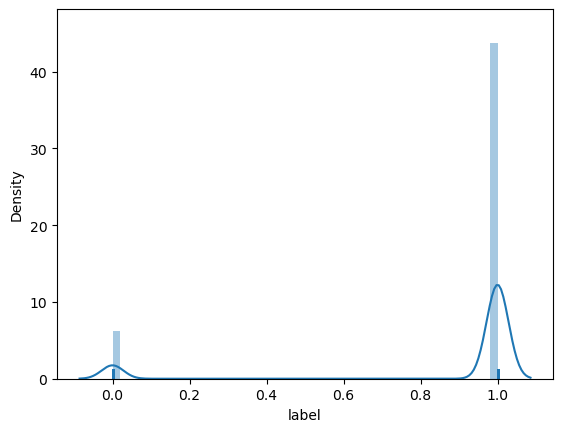

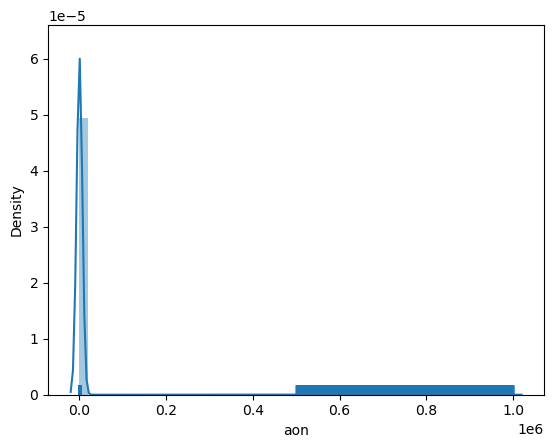

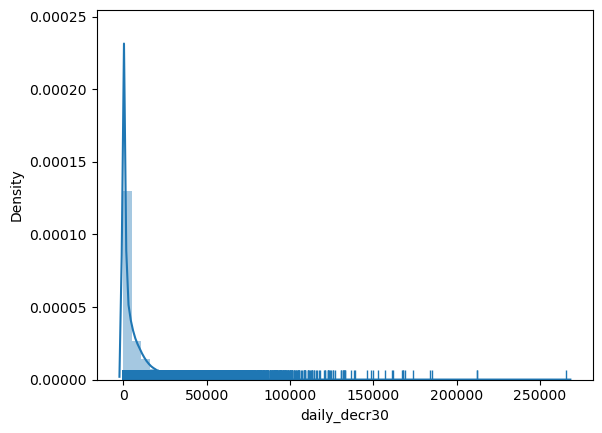

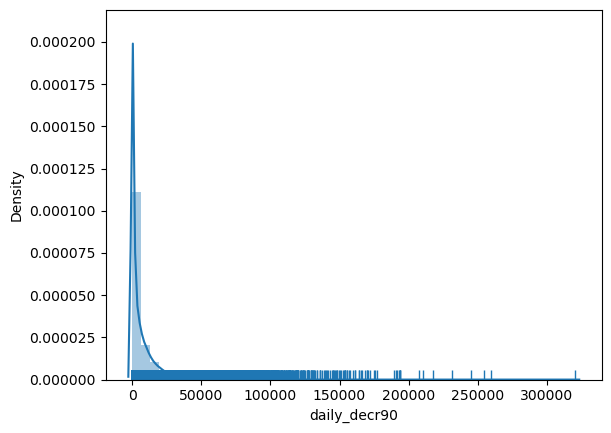

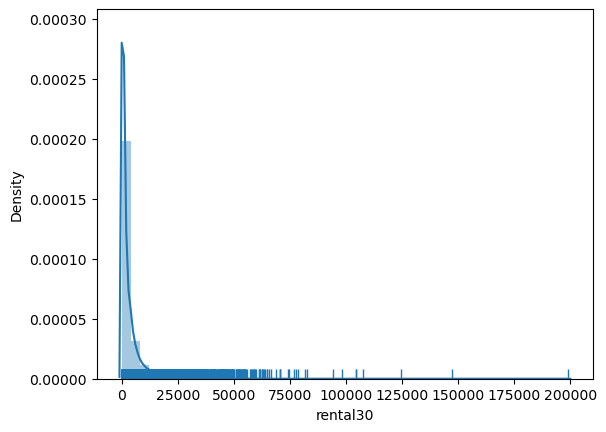

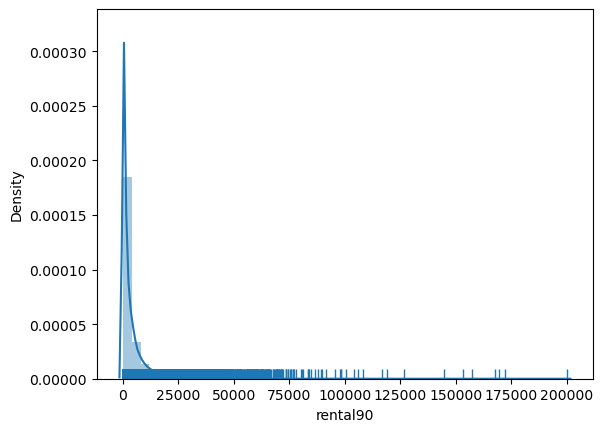

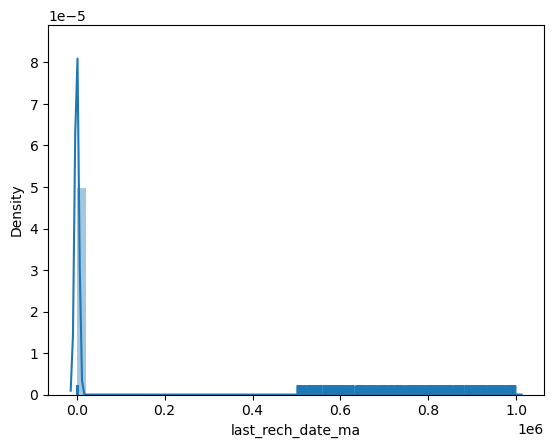

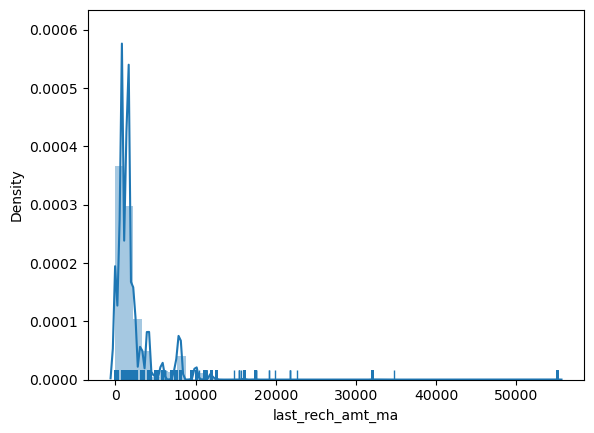

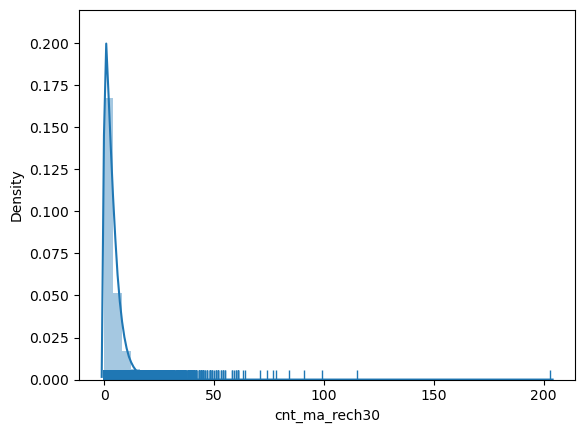

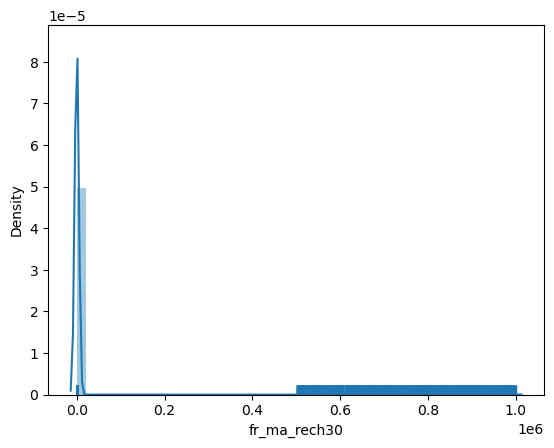

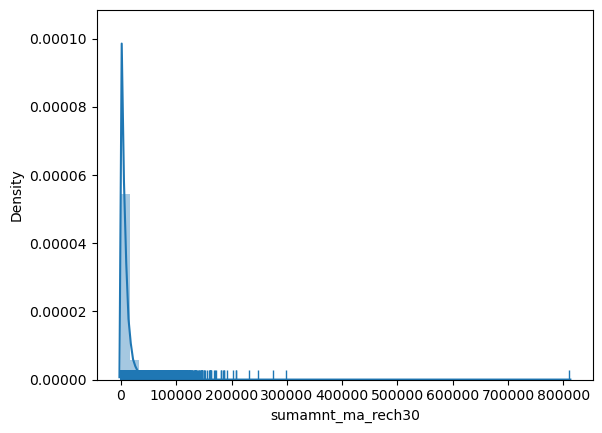

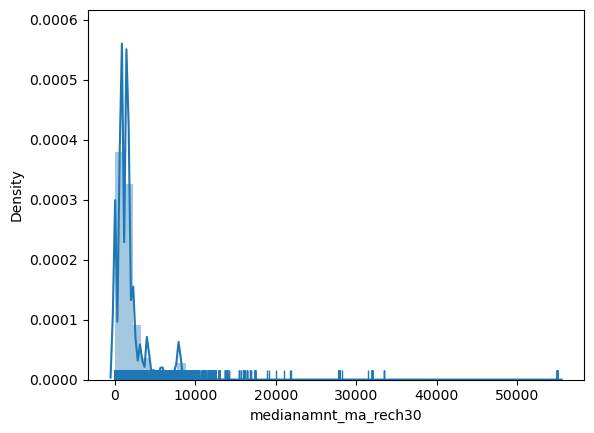

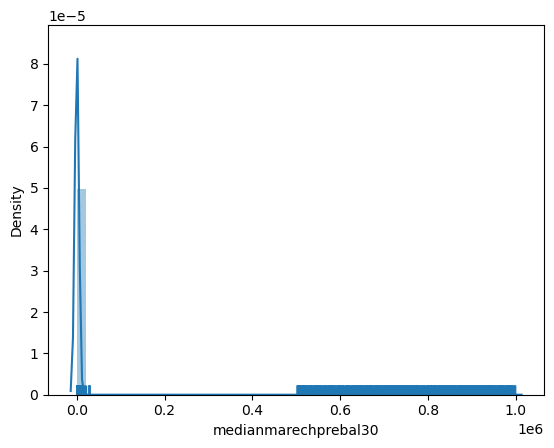

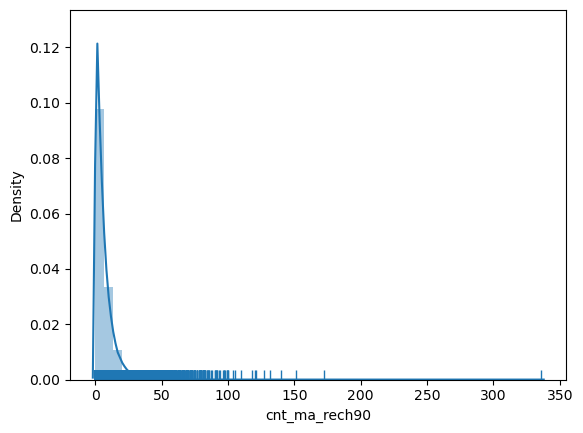

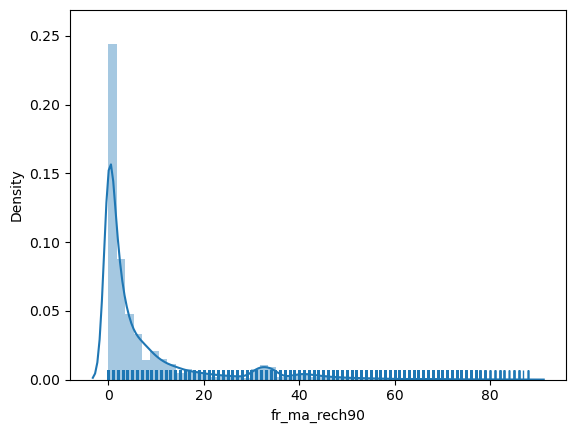

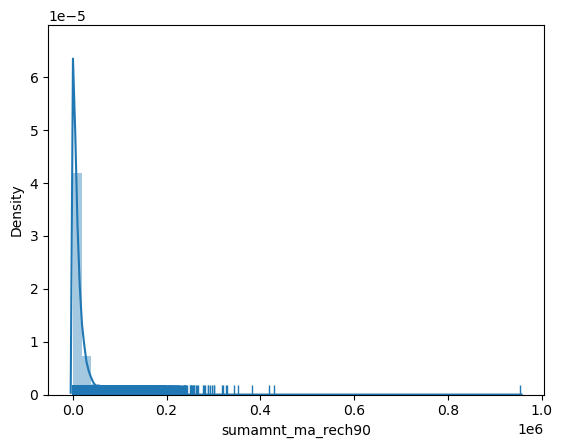

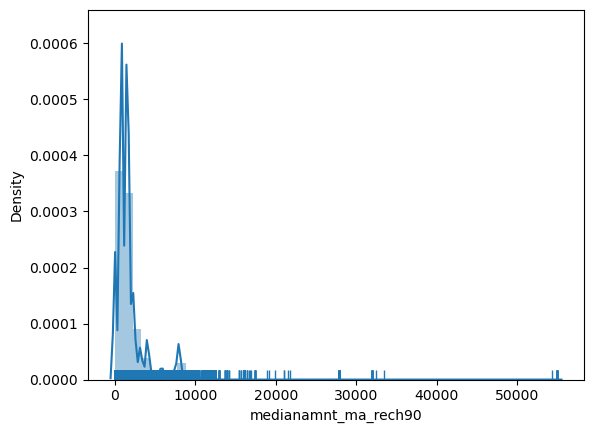

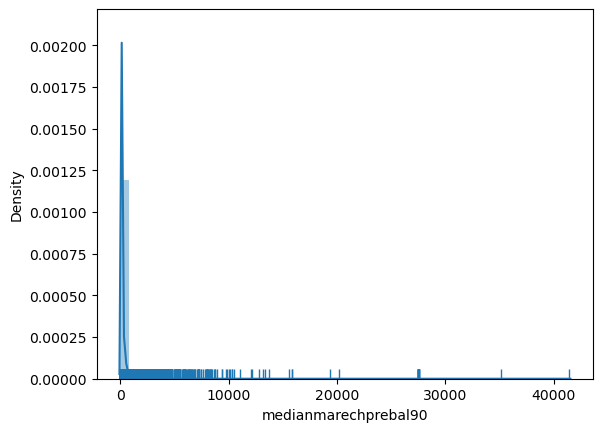

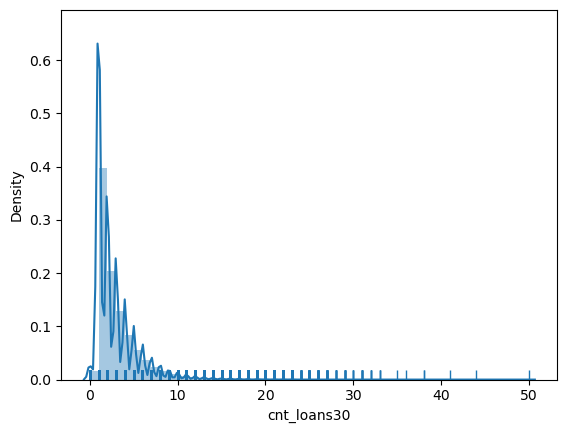

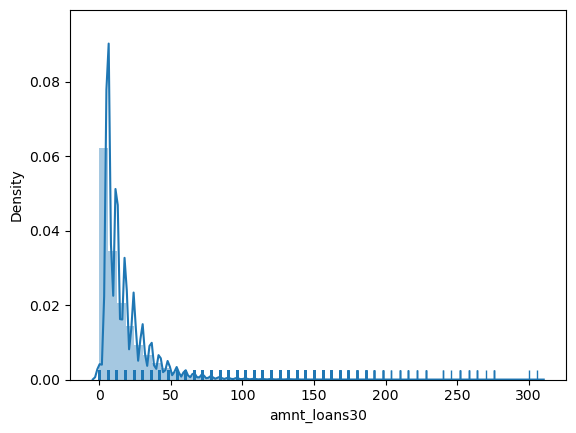

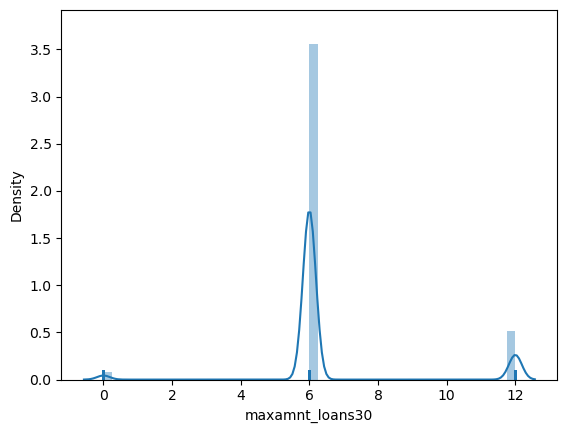

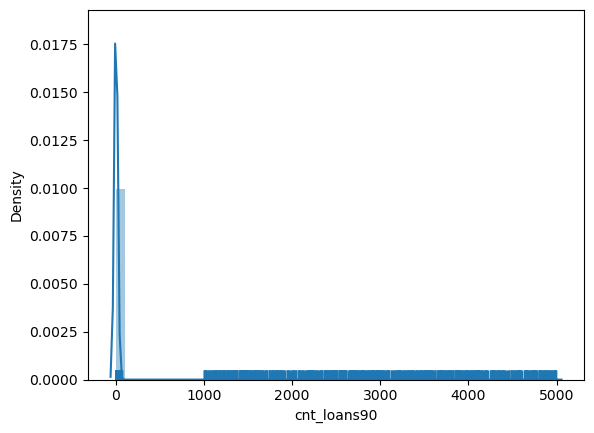

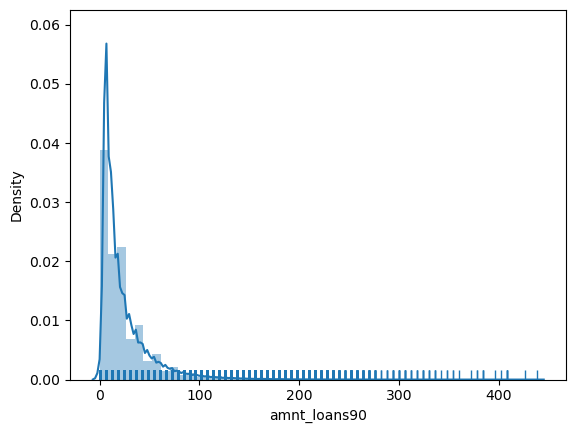

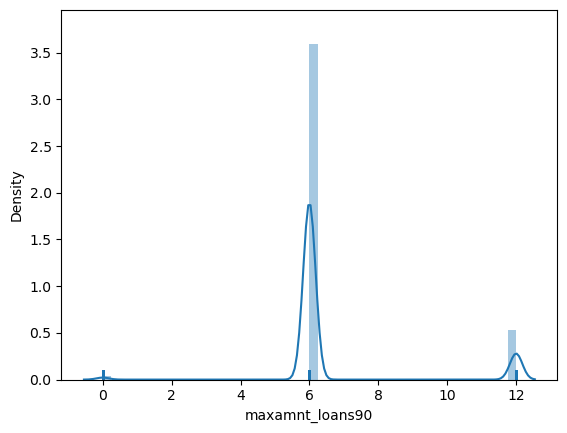

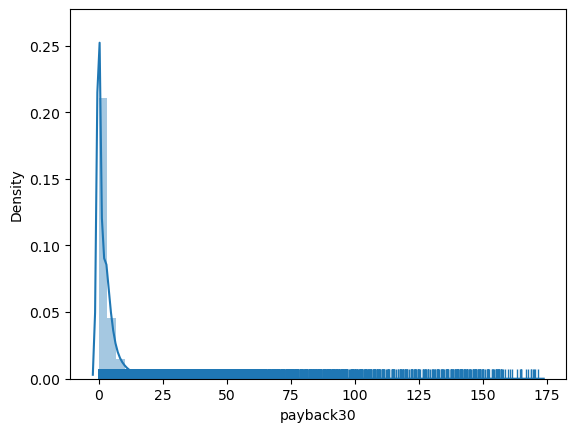

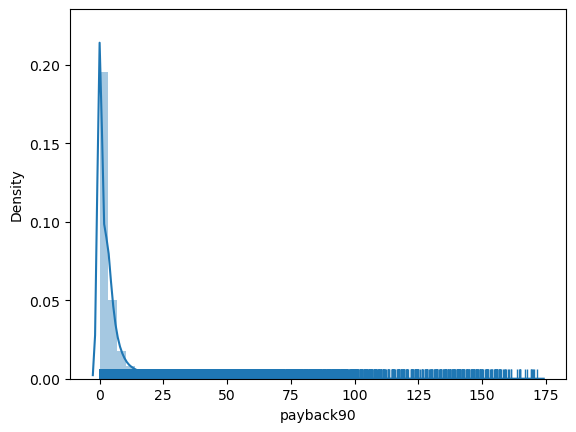

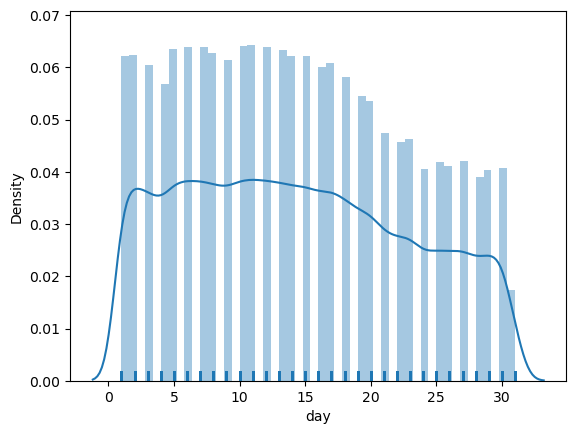

In [472]:
#Plotting distplot for checking the distribution of skewness
for i in df[non_obj]:
    sns.distplot(df[i],kde=True,rug=True)
    plt.show()

Thus we see from distribution curve that almost all the columns  distribution ia not normal and data 
most of the columns are highly spread due to presence of outliers which has to be treated accordingly.
Data is positively skewed which will be taken care of later.

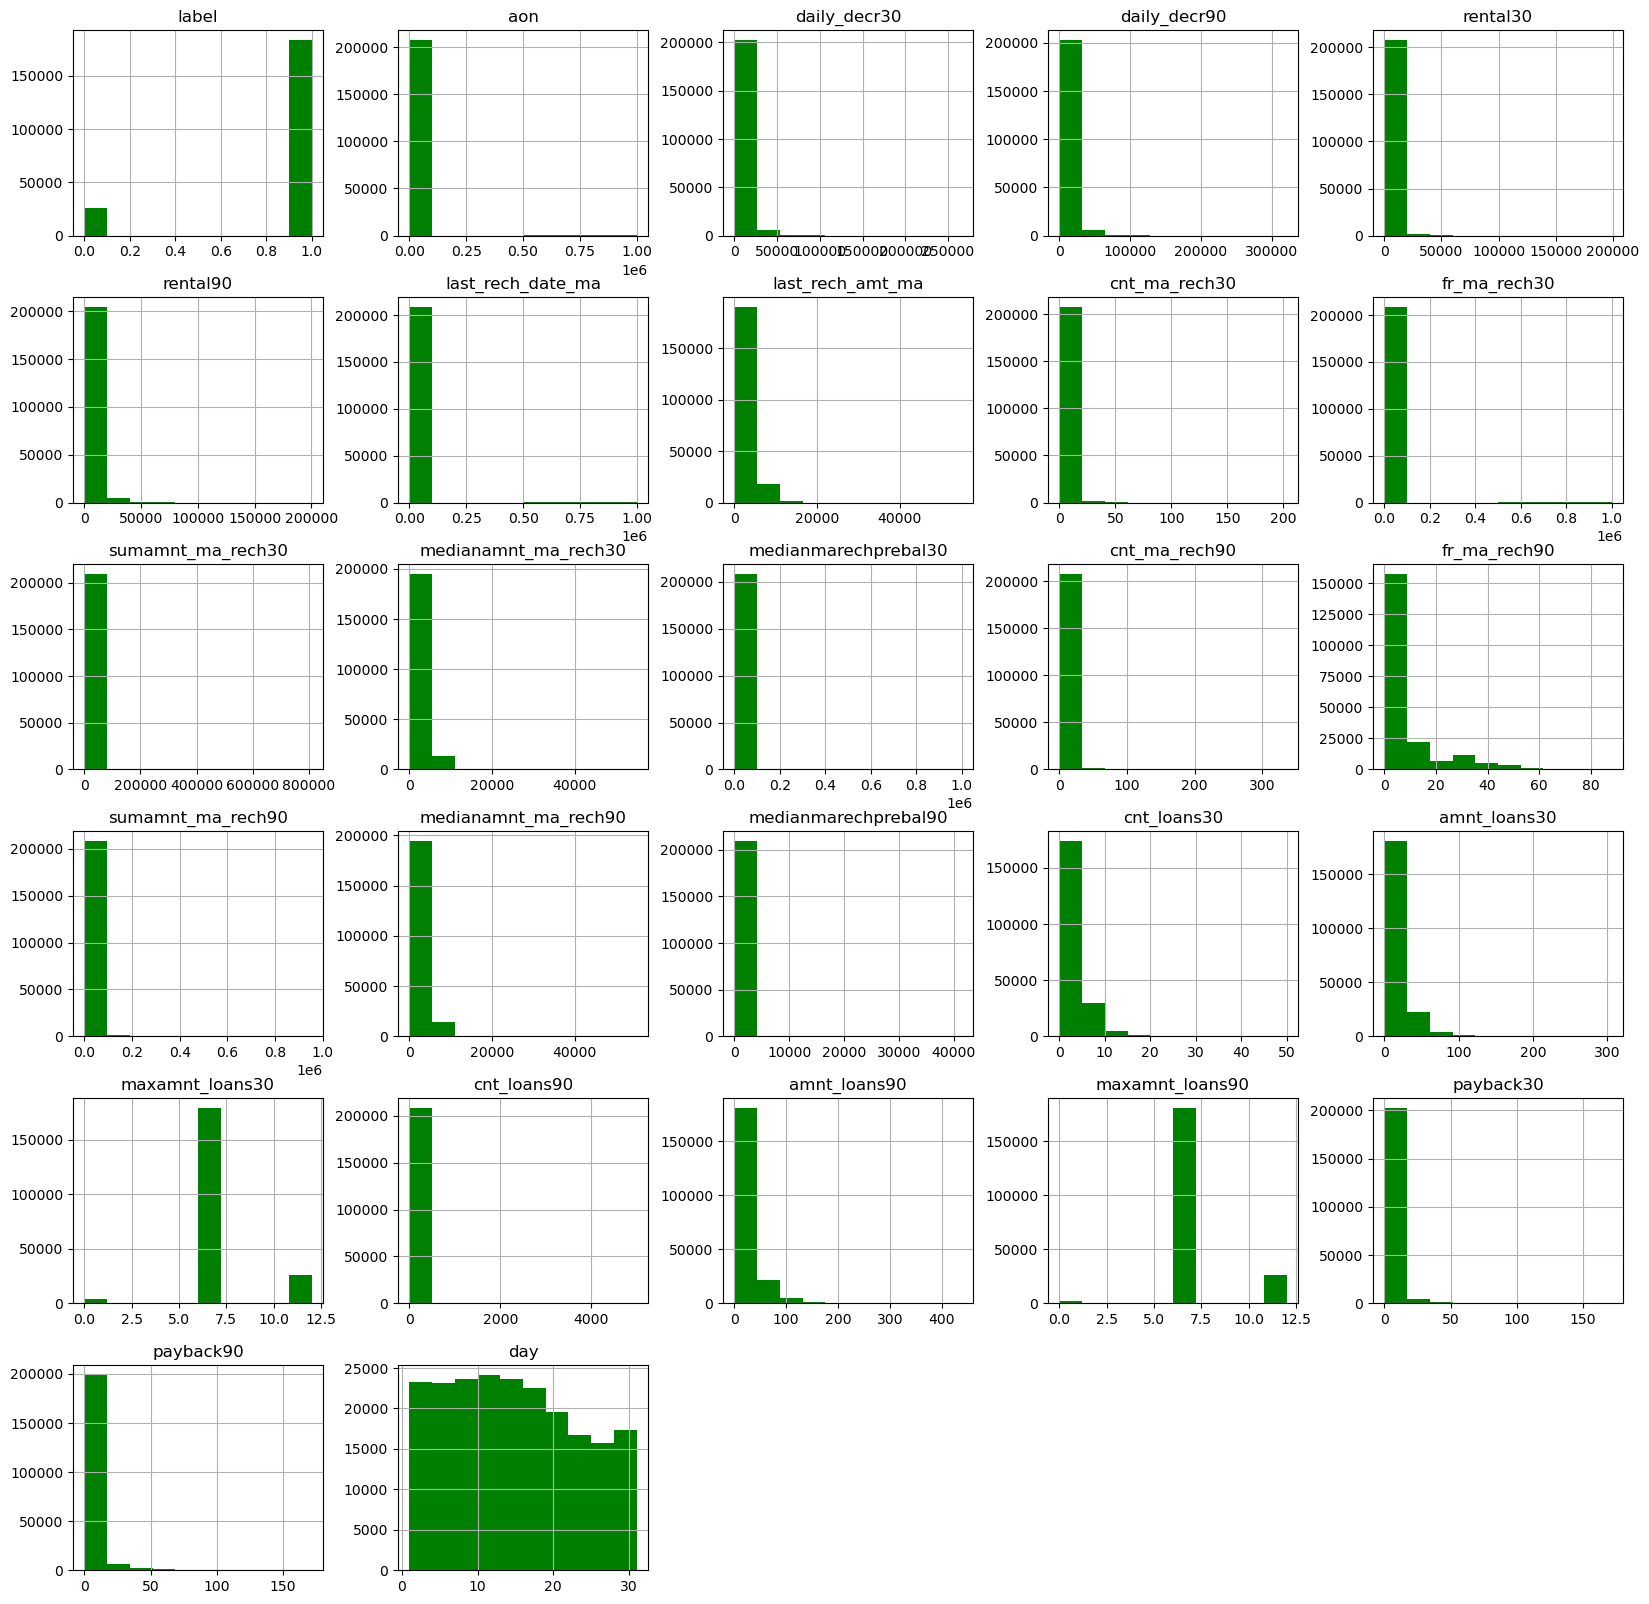

In [473]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='g')
plt.show()

Histogram plots are a great way to visualize distributions of data - In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

<AxesSubplot:xlabel='daily_decr30'>

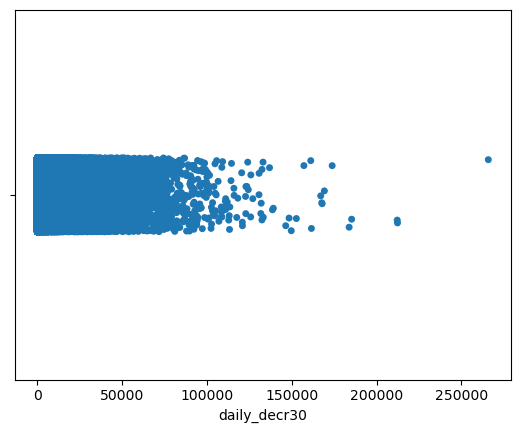

In [474]:
#Daily amount spent from main account,averaged over last 30 days (in Indonesian Rupiah)
sns.stripplot(df['daily_decr30'])

Thus we see most of the people spending daily amount ranges from 0-100000 (averaged over last 30 days) from the main account.

<AxesSubplot:xlabel='daily_decr90'>

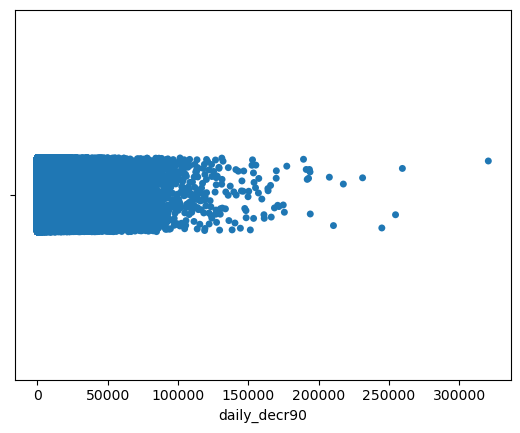

In [475]:
#Daily amount spent from main account,averaged over last 90 days (in Indonesian Rupiah)
sns.stripplot(df['daily_decr90'])

Thus we see the same respnse as above (daily_decre30) daily amount ranges from 0-100000 on average of 90 days. Very few crosses 
250k mark and one is beyond 300k mark which suggest that the person might be having more balances in the account. 

<AxesSubplot:xlabel='rental30'>

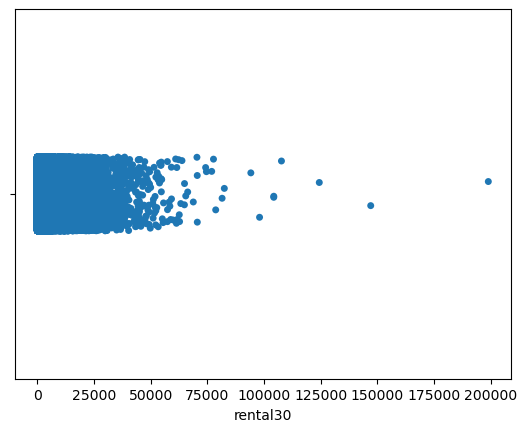

In [476]:
#Average main account balance over last 30 days
sns.stripplot(df['rental30'])

<Figure size 700x700 with 0 Axes>

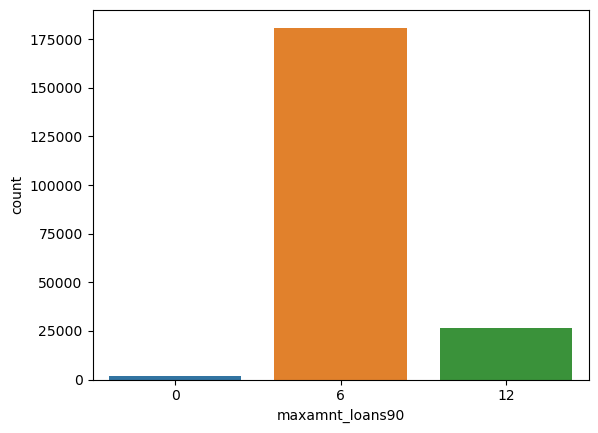

<Figure size 700x700 with 0 Axes>

In [477]:
#max amount of loan taken in 90 days
sns.countplot(df['maxamnt_loans90'])
plt.figure(figsize=[7,7])

For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).Thus we see here that Maximum loan taken by people is 5 for which the payback is 6 followed by 12 and few is zero.

# Bivariate Analysis

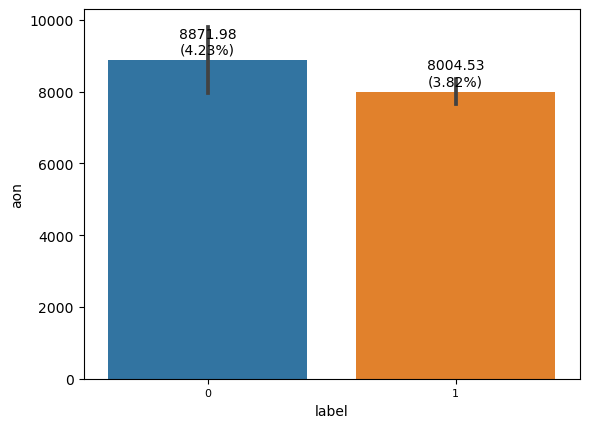

In [478]:
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['aon'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["aon"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()  

From the above bar plot we can observe that the defaulter rate is higher where the user age on cellular network in days is high which accounts to 4.23%.

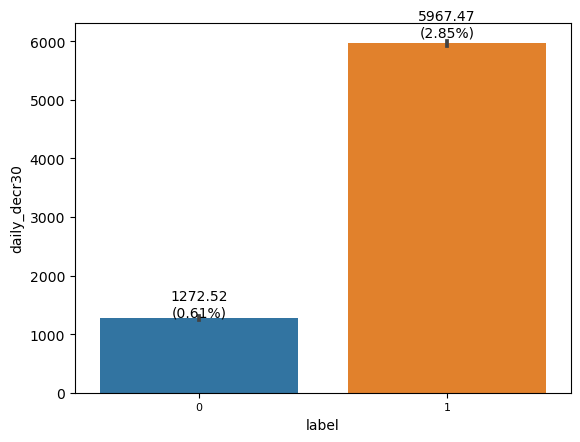

In [479]:
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['daily_decr30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["daily_decr30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()                               

Thus we see that people who spent more money on average tends to return loan amount within 5 days.The percentage of default  is 0.61% who are not able to pay back the money in time.

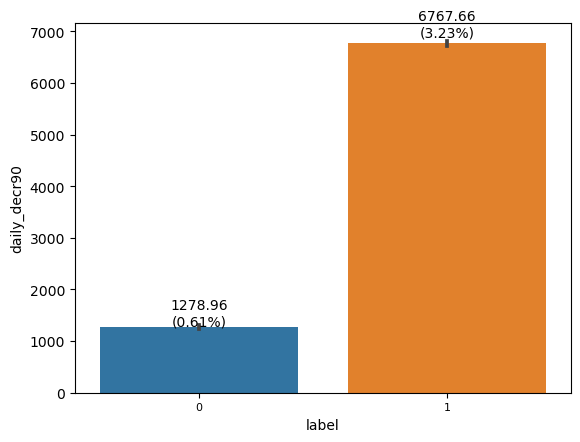

In [480]:
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['daily_decr90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["daily_decr90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show() 

 Thus people who spent more money on average which is around 3.23% tends to return loan amount within 5 days. The person who default is around 0.61%.

<AxesSubplot:xlabel='daily_decr30', ylabel='daily_decr90'>

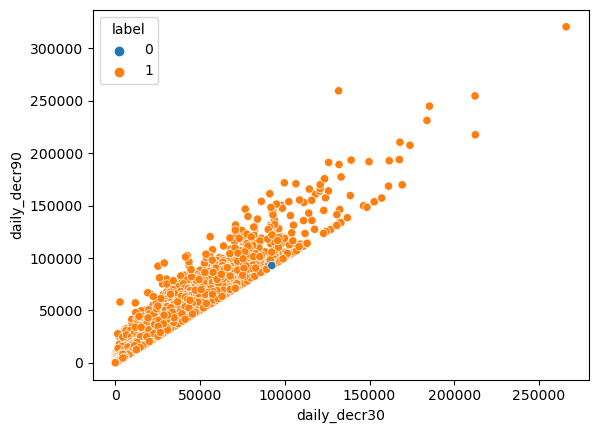

In [481]:
sns.scatterplot(df['daily_decr30'],df['daily_decr90'], hue=df['label'])

Thus we see that people spending money daily on an average for 30 days and 90 days are linearly proprtional i.eThe users who have spent daily amount from main account over last 30 days and 90 days have always paid back the loan amount within 5 days. 

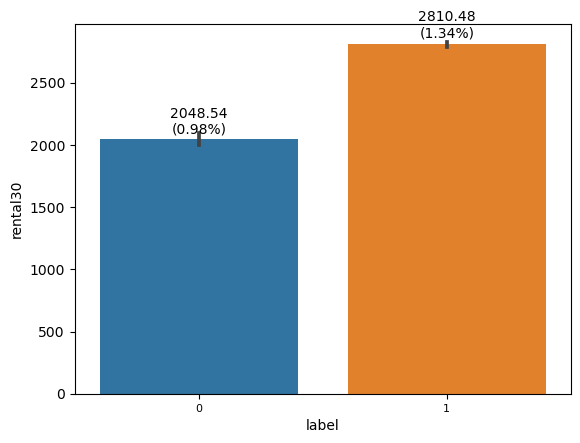

In [482]:
# Comparing label vs Average main account balance over last 30 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['rental30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["rental30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show() 

Thus we see that people having average main account balance over last 30 days are paying the loan amount within 5 days which accounts to 1.33% and rest defaulters are around 0.97% which are either failed to pay back the loan amount as they are not having balance or not paying the loan amount.    

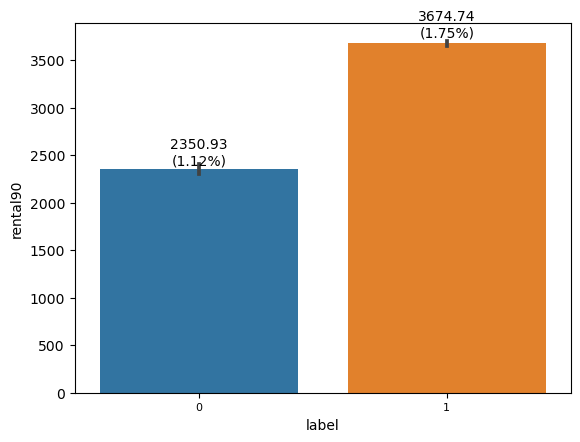

In [483]:
# Comparing label vs Average main account balance over last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['rental90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["rental90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show() 

Those people having average main account balance over 90 days are paying back the loan amount within 5 days which accounts to 1.74% and rest are defaulters which accounts to 1.11% which are not paying back the loan amount within 5 days. 

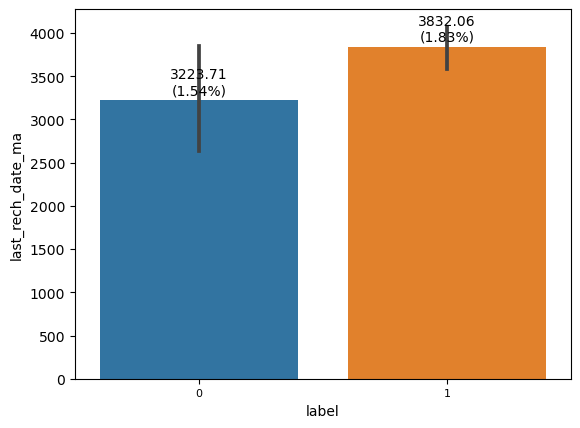

In [484]:
# Comparing label vs Number of days till last recharge of main account
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['last_rech_date_ma'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["last_rech_date_ma"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show() 

Thus we see that people who are recharging the account on time are paying the loan amount on time and also we see that people who are not
paying back their loan amount on time have recharge their main account on time.whierror bars signifies value are more spread out

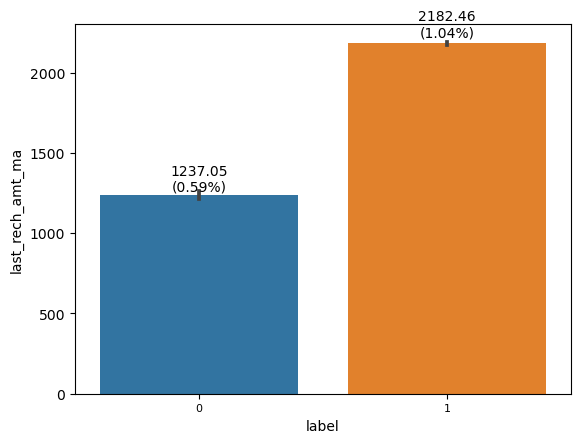

In [485]:
# Comparing label vs Amount of  last recharge of main account
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['last_rech_amt_ma'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["last_rech_amt_ma"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

We see that if the amount of main account is recharged at 2182 amount then more number of people are paying the loan amount within 5 days and rest 0.59% are not paying back the loan amount in time.

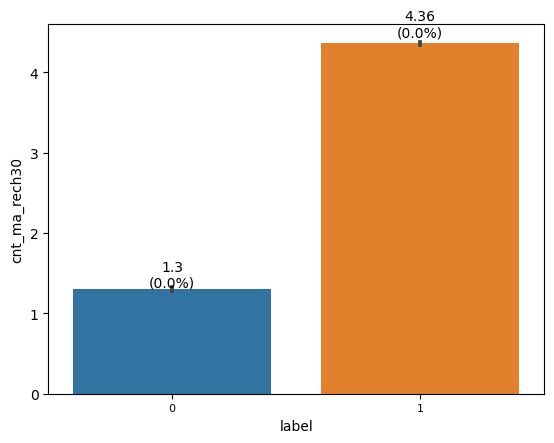

In [486]:
# Comparing label vs Number of times main account got recharged in last 30 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['cnt_ma_rech30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["cnt_ma_rech30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see that users who are paying back the loan within due date tends to recharge their account by 4 times in last 30 days whereas  defaulters recharge their account by one time. 

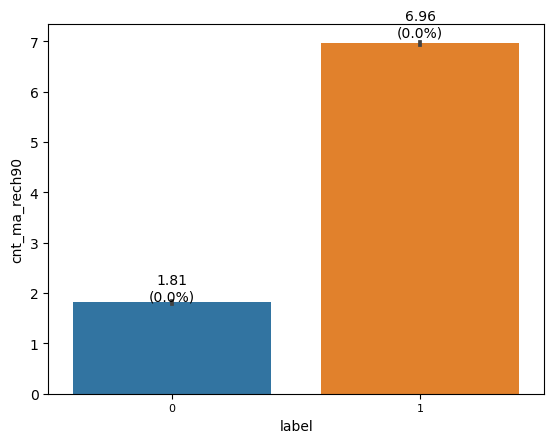

In [487]:
# Comparing label vs Number of times main account got recharged in last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['cnt_ma_rech90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["cnt_ma_rech90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see that users who are paying back the loan in time tends to recharge their account by almost 7 times in last 90 days and defaulters recharge their account by almost two time. 
In other words,those who are able to pay their loan within due date are recharging more times than those who are not able to pay their loan amount within due date.

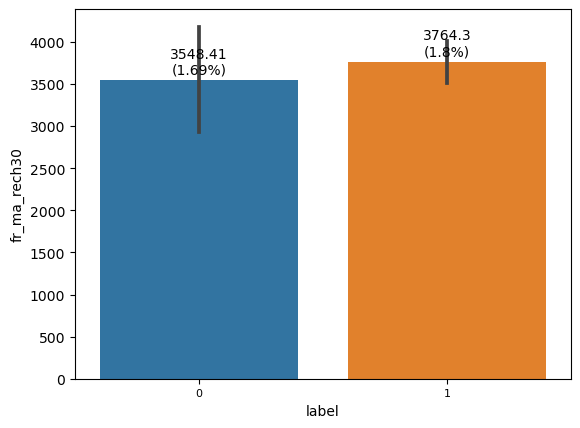

In [488]:
# Comparing label vs Frequency of main account recharged in last 30 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['fr_ma_rech30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["fr_ma_rech30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see the frequncy of recharging the main account for defaulters and non-defaulters are almost same in last 30 days.Even thoigh
the frequncy of recharging is almost same,defaulters are not paying the loan amount within due date.

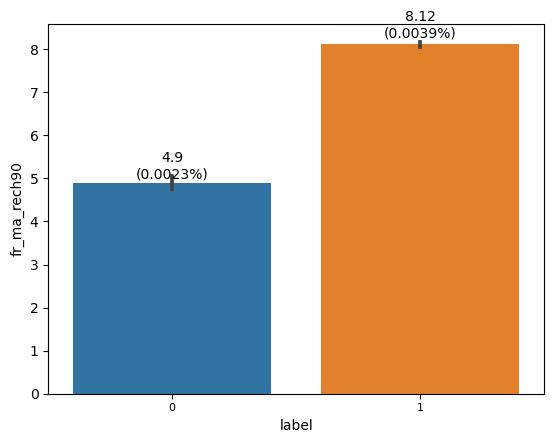

In [489]:
# Comparing label vs Frequency of main account recharged in last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['fr_ma_rech90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["fr_ma_rech90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

The frequency of main account recharged in last 90 days is increased for non-defaulters compared to defaulters.Thus people having 
low frequncy of recharging the main account may cause loss to the company,may be due to fact taht they sometime forget the due date
last date to rechrage the account so company should come forward with push notification like please recharge your account before expiry 
date and certain scheme that if you recharge your account befor due date,then you will get 5 days 1gb data.

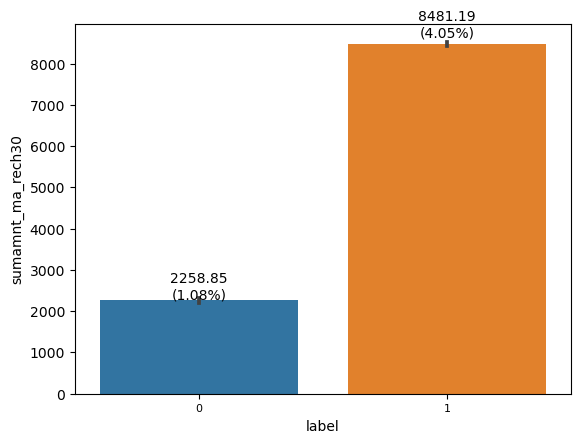

In [490]:
# Comparing label vs Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['sumamnt_ma_rech30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["sumamnt_ma_rech30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus users who are paying back the loan amount within due date are having recharge amount of more than 82k in their main account in past 30 days.Those
who failed to pay back the loan amount in due date ,they are having recharge amount of around Rs22k in the past 30 days.

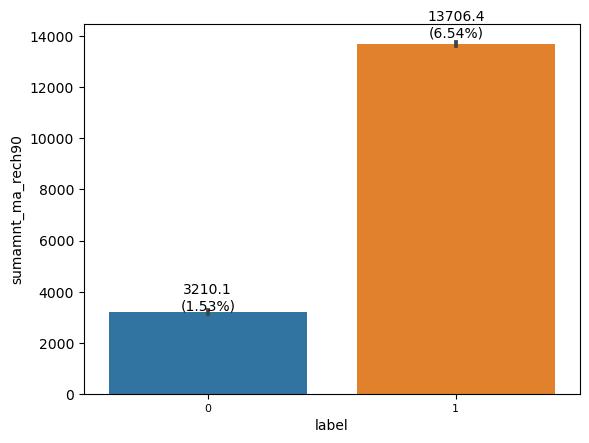

In [491]:
#Comparing label vs Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['sumamnt_ma_rech90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["sumamnt_ma_rech90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()   
    

The users who have paid their loan amount within 5 days have the total amount of recharge around 13700 (Indonesian Rupiah) in last 90 days in their main account while the defaulters have their total amount of recharge around 3200 (Indonesian Rupiah) over last 90 days.

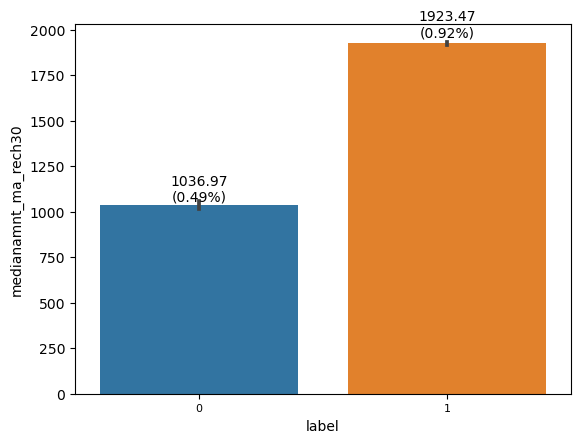

In [492]:
# Comparing label vs Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['medianamnt_ma_rech30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["medianamnt_ma_rech30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

The people who have done their median amount of recharge of 1923 (Indonesian Rupiah) in main account over last 30 days have  credited the due amount within 5 days of issuing loan while the users who have done amount recharge of 1036 have failed to pay back the loan within due date.

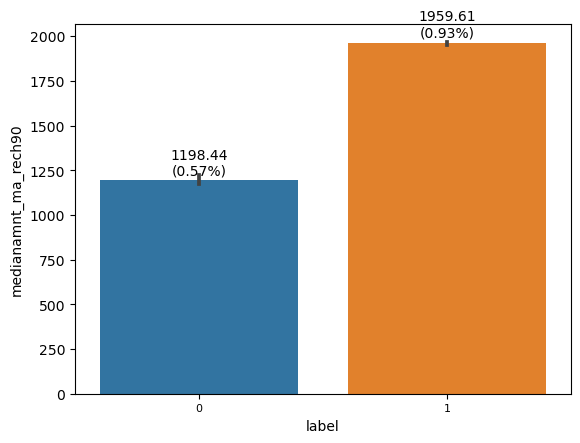

In [493]:
# Comparing label vs Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah)
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['medianamnt_ma_rech90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["medianamnt_ma_rech90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see that people who were having median amount of recharge of around 1959(indonesia rupiah) done in main account over 90 days had paid back the amount within due date and those who were having median amount of 1198(indonesia rupiah) have not paid back the amount in due time.

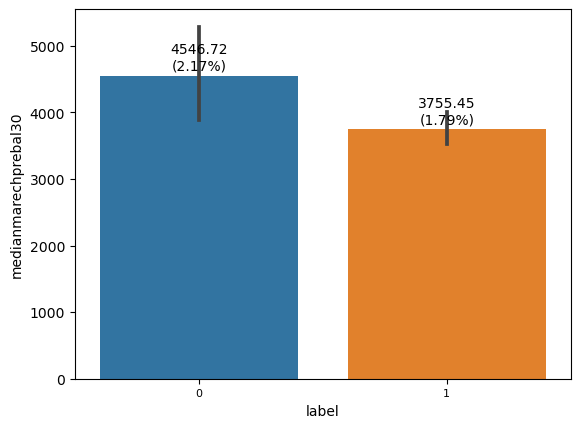

In [494]:
#Comparing label vs Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['medianmarechprebal30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["medianmarechprebal30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see that people who were having median of main account balance of around 4542 (indonesia rupiah) just before recharge in last 30 days tend to default more than those of non-defaulters.

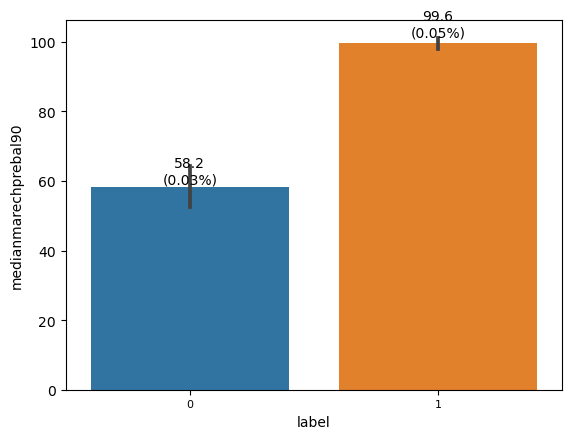

In [495]:
# #Comparing label vs Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['medianmarechprebal90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["medianmarechprebal90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see that the median of main account balance for the people who are paying the credit amount in time are around 98 (Indonesian Rupiah) which is high compared to defaulters .In other words ,if the median of main account balance is increased just before recharge in last 90 days at user level, it also increased the probability of being non-defaulters.

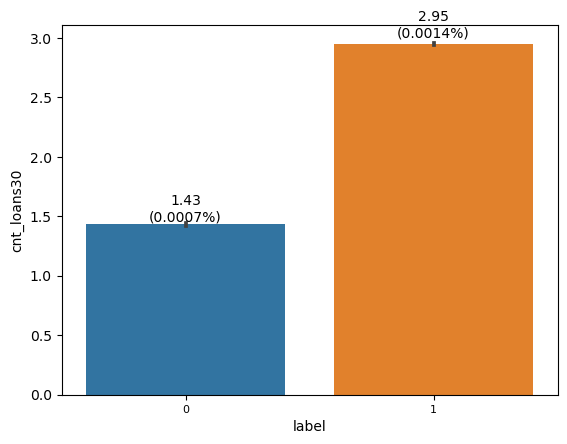

In [496]:
# Comparing label vs Number of loans taken by user in last 30 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['cnt_loans30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["cnt_loans30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see those users who have paid the loan amount in due date ,maximum number of loantakenn by them is 3 in last 30 days.
Those who have taken one loan,they are not able to pay back the  credit amount in last 30 days. 

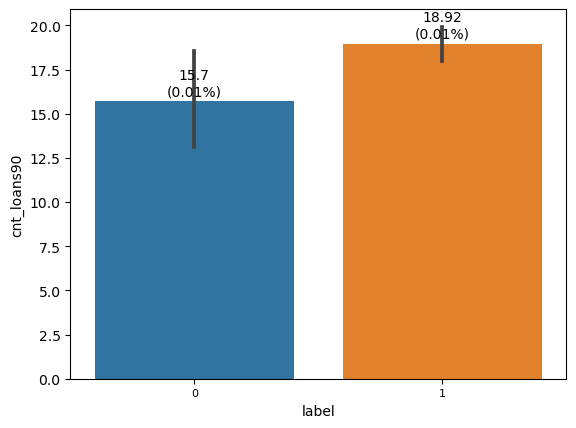

In [497]:
# Comparing label vs Number of loans taken by user in last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['cnt_loans90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["cnt_loans90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see that number of loan taken by defaulters are high in the last 90 days and their probability of not paying credit amount in due date also increased.The number of loan taken by non_defaulter is 19 in last 90 days is increased compare to 30 days.

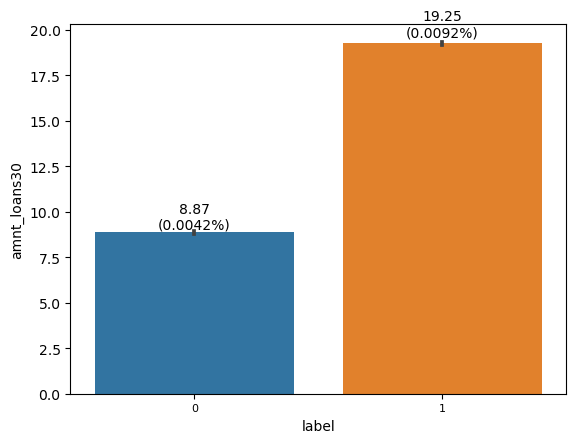

In [498]:
# Comparing label vs Total amount of loans taken by user in last 30 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['amnt_loans30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["amnt_loans30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

The total amount of loans taken by the defaulters in last 30 days were in the range of 7.5-10 while the non-defaulters have taken upto 19 loans in last 30 days.Thus we see if the total amoiunt of loan taken is below 10,then probability of being defaulter is increased.

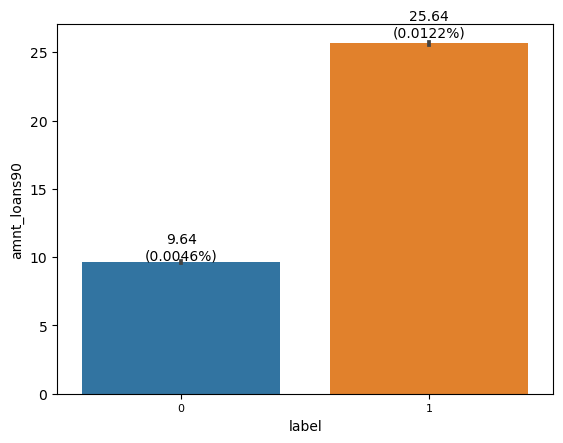

In [499]:
# Comparing label vs Total amount of loans taken by user in last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['amnt_loans90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["amnt_loans90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

The total amount of loans taken by the defaulters in last 90 days was about 10 while the non-defaulters have taken upto 26 loans in last 90 days.Thus we see if the total amount of loan taken is equal or below 10,then probability of being defaulter is increased.

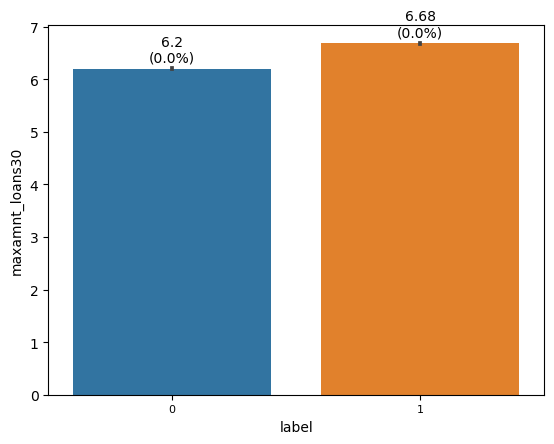

In [500]:
# Comparing label vs maximum amount of loan taken by the user in last 30 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df["maxamnt_loans30"],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["maxamnt_loans30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,2)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

The maximum amount of loan taken by the defaulter is 6 approx  and non_defaulter is 7 approx in last 30 days which is almost same.

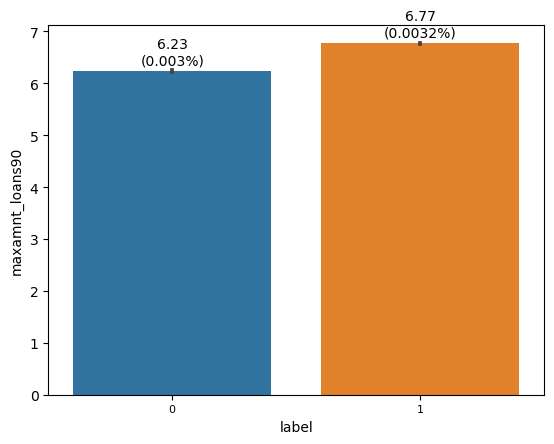

In [501]:
# Comparing label vs maximum amount of loan taken by the user in last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['maxamnt_loans90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["maxamnt_loans90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

The maximum amount of loan taken by the non_defaulter user in last 90 days is 7 approx which they have paid in due time whereas the
maximum amount of loan taken by user who has defaulted is 6 approx.

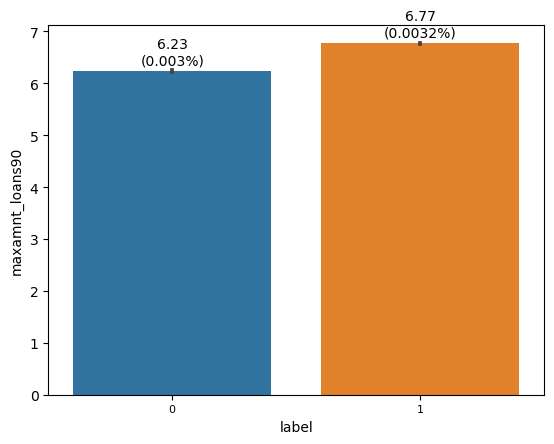

In [502]:
# Comparing label vs maximum amount of loan taken by the user in last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['maxamnt_loans90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["maxamnt_loans90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

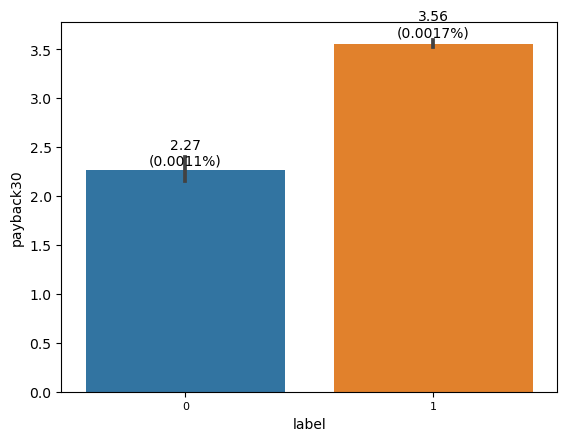

In [503]:
# Comparing label vs Average payback time in days over last 30 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['payback30'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["payback30"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

Thus we see that non_defaulters are paying back the loan amount in average of 3.5 days over last 30 days whereas the defaulters
are paying back the loan amount in an average of 2-2.5 days.Thus when the average payback time is below 2.5,the defaulters rate 
is high. 

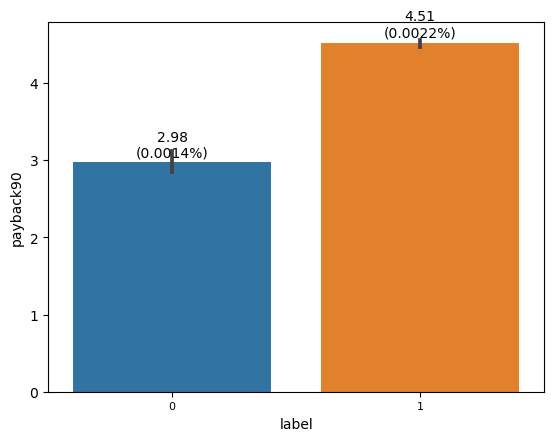

In [504]:
# Comparing label vs Average payback time in days over last 90 days
plt.figure()
figsize=(10,7)
ax = sns.barplot(df['label'],df['payback90'],edgecolor=None,linewidth=2)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = len(df["payback90"])
    ax.annotate(f'{round(height,2)}\n({round(height*100/total,4)}%)', (x + width/2, y + height*1.02), ha='center')
    plt.xticks(fontsize='8')
plt.show()

The average payback time is 4.5 days for non_defaulters over last 90 days whereas the average payback time for 
defaulters is approx 3 days over last 90 days.Thus we see that if the average payback is below 3 ,then probability of defaulting rate is high.

# Multivariate Analysis

In [505]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

label       aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  payback30  payback90       day
label                 1.000000 -0.003788      0.168293      0.166146  0.058645  0.076033           0.003730          0.131804       0.237331      0.001330           0.202828              0.141490             -0.004843       0.236392      0.084385           0.205793              0.120855              0.037126     0.196283      0.197272         0.072203     0.004733      0.199788         0.084144   0.048336   0.049183  0.006825
aon                  -0.003788  1.000000      0.001101      0.000371 -0.000796 -0.000693           0.001692          0.004253      -0.003152     -0.001163           0.000703              0.004303              0.003930      -0.002729      0.004400           0.001007              0.004906             -0.000982    -0.001830     -0.001730        -0.000692    -0.000611     -0.002323        -0.001193   0.001938   0.002201  0.000659
daily_decr30          0.168293  0.001101      1.000000      0.977704  0.441532  0.459200           0.000484          0.275836       0.451383     -0.000577           0.636535              0.295355             -0.001160       0.587337     -0.078301           0.762981              0.257846              0.036432     0.366114      0.471490         0.371585     0.008962      0.563495         0.400199   0.026914   0.047174  0.006480
daily_decr90          0.166146  0.000371      0.977704      1.000000  0.434106  0.471894           0.000905          0.264130       0.426706     -0.000343           0.603885              0.282959             -0.000753       0.593068     -0.079531           0.768816              0.250518              0.035318     0.340385      0.447867         0.365176     0.009446      0.567203         0.397251   0.019399   0.040799 -0.021505
rental30              0.058645 -0.000796      0.441532      0.434106  1.000000  0.955014          -0.001177          0.134436       0.235484     -0.001207           0.285599              0.138196             -0.001367       0.312944     -0.033150           0.350876              0.118533              0.028351     0.181107      0.234186         0.213064     0.004084      0.298886         0.234106   0.072888   0.094828  0.038310
rental90              0.076033 -0.000693      0.459200      0.471894  0.955014  1.000000          -0.001781          0.127888       0.231900     -0.000525           0.270504              0.127414             -0.001211       0.346136     -0.036160           0.368419              0.110478              0.030613     0.172183      0.232432         0.224166     0.005183      0.327480         0.251250   0.067003   0.099257  0.010126
last_rech_date_ma     0.003730  0.001692      0.000484      0.000905 -0.001177 -0.001781           1.000000         -0.000146       0.004308     -0.001629           0.002103             -0.001357              0.004071       0.004260      0.001419           0.002241             -0.000725             -0.001089     0.001190      0.000900        -0.001354    -0.000226      0.000867        -0.001124  -0.002235  -0.001585  0.000557
last_rech_amt_ma      0.131804  0.004253      0.275836      0.264130  0.134436  0.127888          -0.000146          1.000000      -0.002662      0.002876           0.440821              0.794646             -0.002344       0.016707      0.106267           0.418735              0.818734              0.124681    -0.027612      0.008502         0.134299     0.000093      0.014067         0.148460  -0.027369  -0.014260  0.028883
cnt_ma_rech30         0.237331 -0.003152      0.451383      0.426706  0.235484  0.231900           0.004308         -0.002662       1.000000      0.001669 

This gives the correlation between the denpendent and independent variables

### Plotting heatmap for visualizing the correlation
Correlation heatmaps can be used to find both linear and nonlinear relationships between variables.

1.A perfect positively correlated linear relationship would have a correlation coefficient of +1. The closer to +1 the coefficient, the more directly correlated the figures are.

2.A perfect negative correlation would have a correlation coefficient of -1.

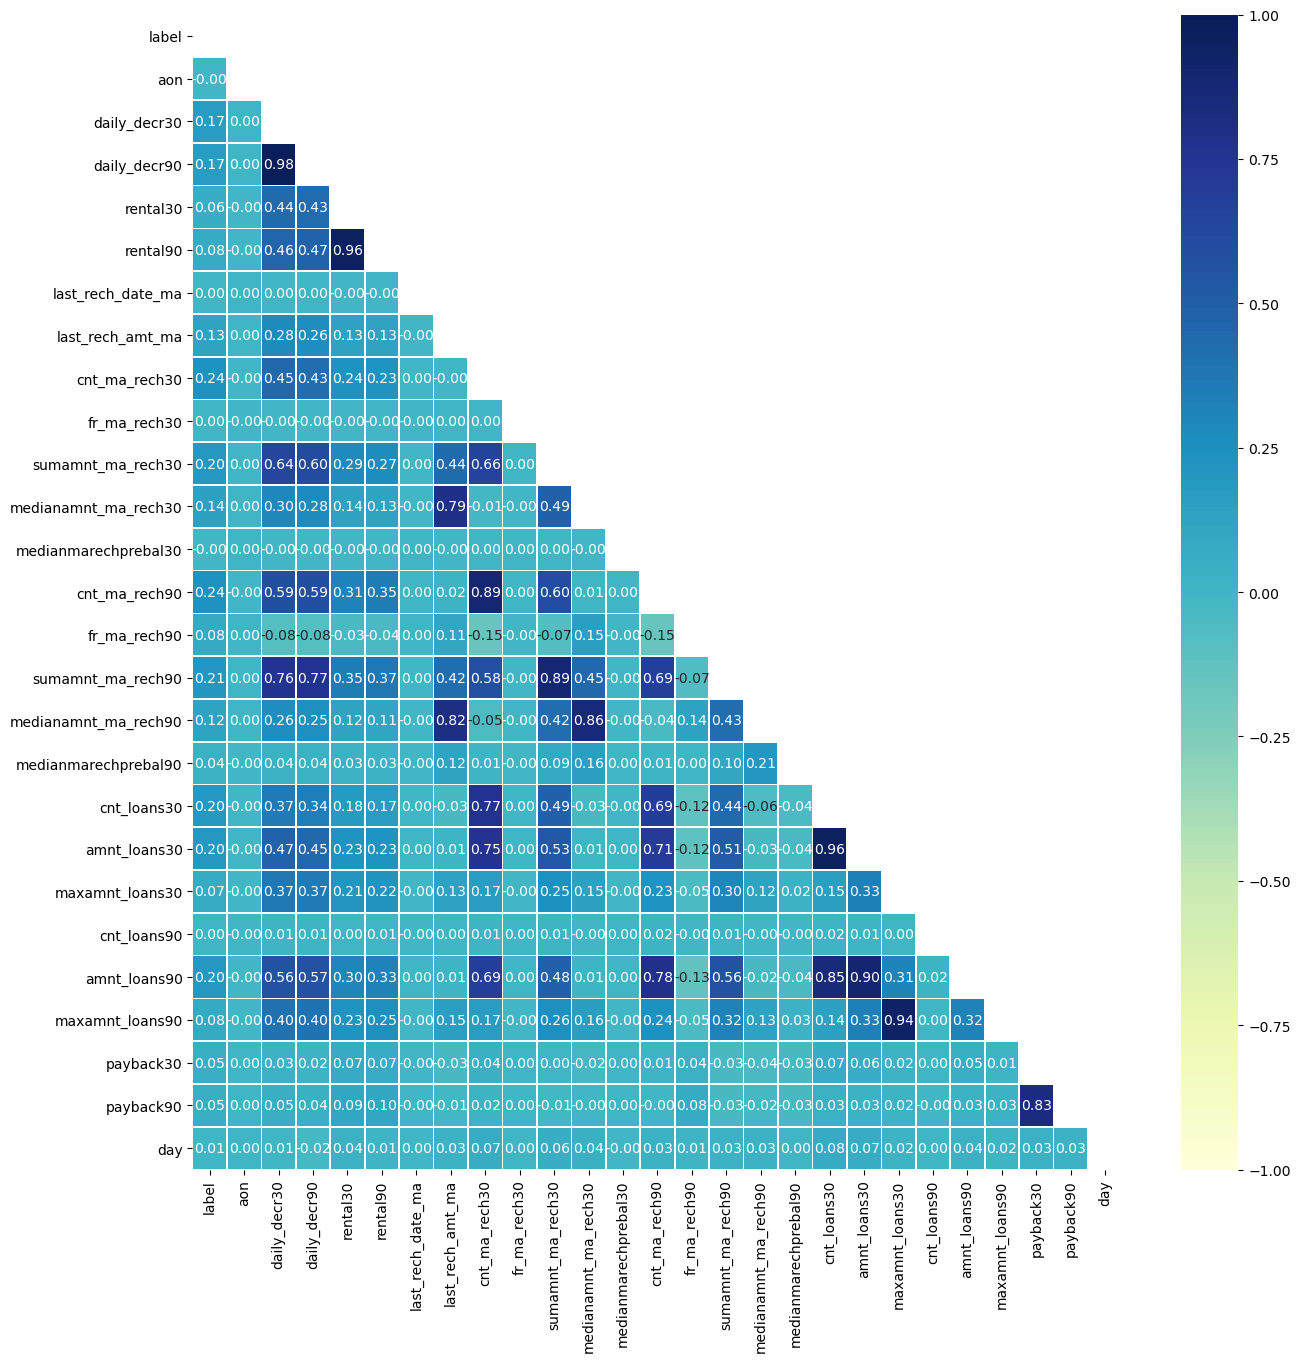

In [506]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask,
          vmin=-1,vmax= +1,cmap="YlGnBu",linewidth=0.5)
plt.show()

Thus we see that :
1.It shows relationship between features and between label and features.We get to know from heatmap that there is no strong relationship between label and features.

2.Dark shades are highly positively correlated with the label and light shades are highly negatively correlated with the label.

3.Label is negatively correlated with aon and medianmarechprebal30.

5.Columns like cnt_ma_rech30,cnt_ma_rech90,amnt_loans30 , amnt_loans90,cnt_loans30, cnt_loans90,
sumamnt_ma_rech30,sumamnt_ma_rech90 were having positive correlation of20-24% with the label. 

4.We also observe multicollinearity in between fetaures, we may PCA or VIF or feature selection using pearsons correlationm for handling the same.

In [507]:
#correlation between label and features
df.corr()['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168293
daily_decr90            0.166146
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.076033
maxamnt_loans30         0.072203
rental30                0.058645
payback90               0.049183
payback30               0.048336
medianmarechprebal90    0.037126
day                     0.006825
cnt_loans90             0.004733
last_rech_date_ma       0.003730
fr_ma_rech30            0.001330
aon                    -0.003788
medianmarechprebal30   -0.004843
Name: label, dtype: float64

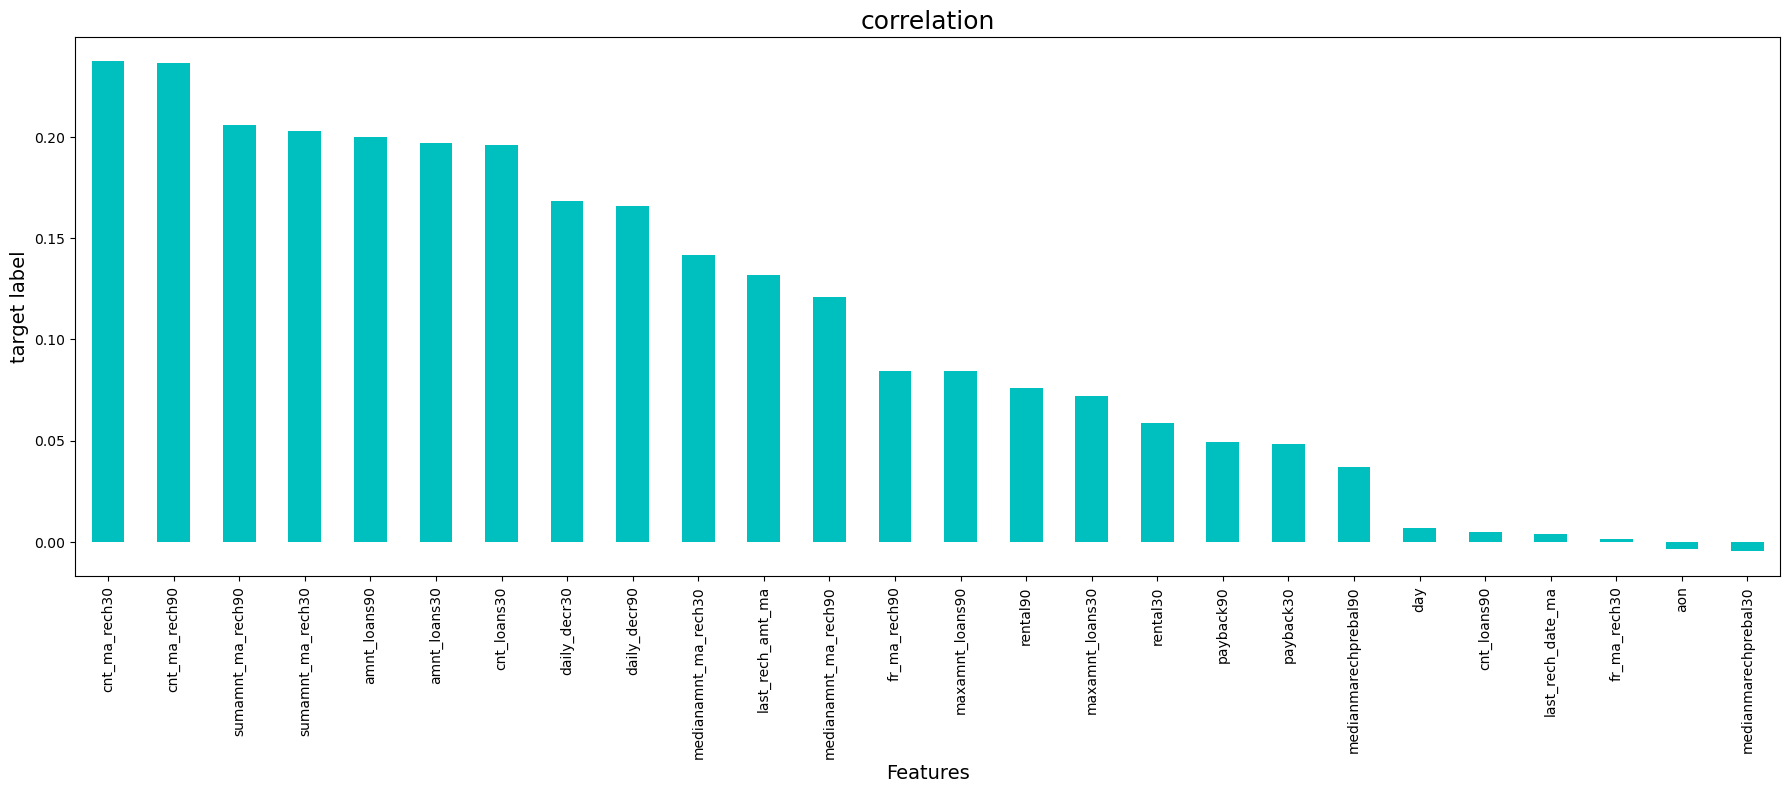

In [508]:
#bar plot showing correlation bw target and features
plt.figure(figsize=(22,7))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Thus we see that label is negatively correlated with aon and medianmarechprebal30 and with rest,it is positively correlated.

# Handling Outliers

label                     AxesSubplot(0.125,0.825775;0.0824468x0.0542254)
aon                     AxesSubplot(0.223936,0.825775;0.0824468x0.0542...
daily_decr30            AxesSubplot(0.322872,0.825775;0.0824468x0.0542...
daily_decr90            AxesSubplot(0.421809,0.825775;0.0824468x0.0542...
rental30                AxesSubplot(0.520745,0.825775;0.0824468x0.0542...
rental90                AxesSubplot(0.619681,0.825775;0.0824468x0.0542...
last_rech_date_ma       AxesSubplot(0.718617,0.825775;0.0824468x0.0542...
last_rech_amt_ma        AxesSubplot(0.817553,0.825775;0.0824468x0.0542...
cnt_ma_rech30             AxesSubplot(0.125,0.760704;0.0824468x0.0542254)
fr_ma_rech30            AxesSubplot(0.223936,0.760704;0.0824468x0.0542...
sumamnt_ma_rech30       AxesSubplot(0.322872,0.760704;0.0824468x0.0542...
medianamnt_ma_rech30    AxesSubplot(0.421809,0.760704;0.0824468x0.0542...
medianmarechprebal30    AxesSubplot(0.520745,0.760704;0.0824468x0.0542...
cnt_ma_rech90           AxesSubplot(0.

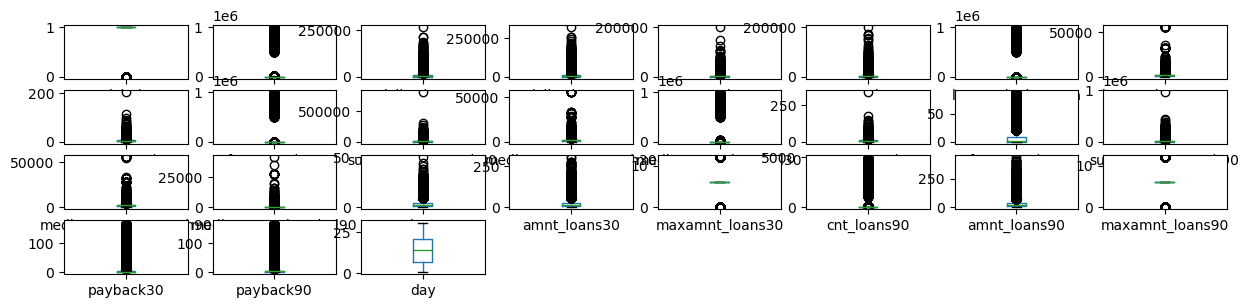

In [509]:
df.plot(kind='box',subplots=True,layout=(12,8),figsize=(15,10))

We can see that there are outliers in the dataset and we can handle them by using z-score method

### Handling outliers by using z-score method

In [510]:
#removal of outliers
col= df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(col))
# Creating new dataframe by setting z to 3
df_new = df[(z<3).all(axis=1)] 
df_new

label       msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  payback30  payback90   month  day
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13    260.13                2.0              1539              2          21.0             3078.0                1539.0                  7.50              2            21               3078                1539.0                  7.50            2            12              6.0          2.0            12                6  29.000000  29.000000    July   20
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   3691.26               20.0              5787              1           0.0             5787.0                5787.0                 61.04              1             0               5787                5787.0                 61.04            1            12             12.0          1.0            12               12   0.000000   0.000000  August   10
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13    900.13                3.0              1539              1           0.0             1539.0                1539.0                 66.32              1             0               1539                1539.0                 66.32            1             6              6.0          1.0             6                6   0.000000   0.000000  August   19
3           1  55773I70781   241.0     21.228000     21.228000    159.42    159.42               41.0               947              0           0.0                0.0                   0.0                  0.00              1             0                947                 947.0                  2.50            2            12              6.0          2.0            12                6   0.000000   0.000000    June    6
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   1098.90                4.0              2309              7           2.0            20029.0                2309.0                 29.00              8             2              23496                2888.0                 35.00            7            42              6.0          7.0            42                6   2.333333   2.333333    June   22
...       ...          ...     ...           ...           ...       ...       ...                ...               ...            ...           ...                ...                   ...                   ...            ...           ...                ...                   ...                   ...          ...           ...              ...          ...           ...              ...        ...        ...     ...  ...
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   1089.19                1.0              4048              3           2.0            10404.0                3178.0                 91.81              3             2              10404                3178.0                 91.81            2            12              6.0          2.0            12                6   1.000000   1.000000    June   17
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   1728.36                4.0               773              4           1.0             3092.0                 773.0                161.30              6             2               4038                 773.0                111.80            3            18              6.0          3.0            18                6   1.000000   1.000000    June   12
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   8893.20                3.0              1539              5           8.0             9334

In [511]:
print ("Dataframe Shape before removing outliers: ", df.shape)
print ("Dataframe Shape after removing outliers: ", df_new.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Dataframe Shape before removing outliers:  (209593, 29)
Dataframe Shape after removing outliers:  (170212, 29)
Percentage of data loss after outlier removal:  18.789272542499035


Thus using threshold as 3 ,the data loss was huge that is 18.7%, so we choose to not remove the outliers by zscore as we cant afford this huge data loss. 

# IQR METHOD

As the most of the columns are right skewed distributed so applying IQR method here.

In [512]:
out=['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'payback30',
 'payback90',
  'day']

In [513]:
for i in out:
    IQR= df[i].quantile(.75)-df[i].quantile(.25)
    lower=df[i].quantile(.25) - (1.5 * IQR)
    upper=df[i].quantile(.75) + (1.5 * IQR)
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

label                     AxesSubplot(0.125,0.825775;0.0824468x0.0542254)
aon                     AxesSubplot(0.223936,0.825775;0.0824468x0.0542...
daily_decr30            AxesSubplot(0.322872,0.825775;0.0824468x0.0542...
daily_decr90            AxesSubplot(0.421809,0.825775;0.0824468x0.0542...
rental30                AxesSubplot(0.520745,0.825775;0.0824468x0.0542...
rental90                AxesSubplot(0.619681,0.825775;0.0824468x0.0542...
last_rech_date_ma       AxesSubplot(0.718617,0.825775;0.0824468x0.0542...
last_rech_amt_ma        AxesSubplot(0.817553,0.825775;0.0824468x0.0542...
cnt_ma_rech30             AxesSubplot(0.125,0.760704;0.0824468x0.0542254)
fr_ma_rech30            AxesSubplot(0.223936,0.760704;0.0824468x0.0542...
sumamnt_ma_rech30       AxesSubplot(0.322872,0.760704;0.0824468x0.0542...
medianamnt_ma_rech30    AxesSubplot(0.421809,0.760704;0.0824468x0.0542...
medianmarechprebal30    AxesSubplot(0.520745,0.760704;0.0824468x0.0542...
cnt_ma_rech90           AxesSubplot(0.

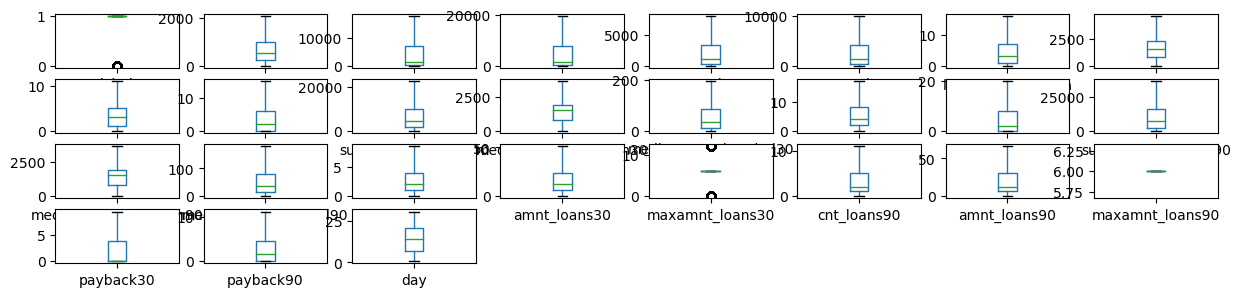

In [514]:
#validating outliers #Boxplot
df.plot(kind='box',subplots=True,layout=(12,8),figsize=(15,10))

Thus most of the outliers have removed.

In [515]:
df.skew()

label                  -2.270254
aon                     0.952374
daily_decr30            1.239238
daily_decr90            1.239001
rental30                1.215453
rental90                1.210361
last_rech_date_ma       1.133958
last_rech_amt_ma        1.003446
cnt_ma_rech30           0.904157
fr_ma_rech30            1.253282
sumamnt_ma_rech30       1.080771
medianamnt_ma_rech30    0.728219
medianmarechprebal30    1.105328
cnt_ma_rech90           0.934789
fr_ma_rech90            1.172479
sumamnt_ma_rech90       1.126421
medianamnt_ma_rech90    0.763904
medianmarechprebal90    1.083476
cnt_loans30             1.340348
amnt_loans30            1.231090
maxamnt_loans30         1.241879
cnt_loans90             1.281861
amnt_loans90            1.217940
maxamnt_loans90         0.000000
payback30               1.189312
payback90               1.170815
day                     0.199845
dtype: float64

Thus handling outleirs has somewhat handled skewness too.

## Encoding the categorical object datatype column

In [516]:
#using Label encoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df.columns:
    if df[i].dtypes== "object":
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))   

In [517]:
df.head(5)

label  msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  payback30  payback90  month   day
0      0   40191  272.0   3055.050000   3065.150000    220.13    260.13                2.0            1539.0            2.0          15.0             3078.0                1539.0                  7.50            2.0          20.0             3078.0                1539.0                  7.50          2.0          12.0              6.0          2.0          12.0              6.0   9.375000  11.250000      1  20.0
1      1  142291  712.0  12122.000000  12124.750000   3691.26   3691.26               16.0            4617.5            1.0           0.0             5787.0                3655.0                 61.04            1.0           0.0             5787.0                3650.5                 61.04          1.0          12.0             12.0          1.0          12.0              6.0   0.000000   0.000000      0  10.0
2      1   33594  535.0   1398.000000   1398.000000    900.13    900.13                3.0            1539.0            1.0           0.0             1539.0                1539.0                 66.32            1.0           0.0             1539.0                1539.0                 66.32          1.0           6.0              6.0          1.0           6.0              6.0   0.000000   0.000000      0  19.0
3      1  104157  241.0     21.228000     21.228000    159.42    159.42               16.0             947.0            0.0           0.0                0.0                   0.0                  0.00            1.0           0.0              947.0                 947.0                  2.50          2.0          12.0              6.0          2.0          12.0              6.0   0.000000   0.000000      2   6.0
4      1    6910  947.0    150.619333    150.619333   1098.90   1098.90                4.0            2309.0            7.0           2.0            20029.0                2309.0                 29.00            8.0           2.0            23496.0                2888.0                 35.00          7.0          42.0              6.0          7.0          42.0              6.0   2.333333   2.333333      2  22.0

# Separating the feature and label into x and y

In [518]:
x = df.drop("label", axis=1)
y = df["label"]

# Feature Selection through VIF:Removing Multicollinearity

In [519]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [520]:
def vif_cal():
    vif=pd.DataFrame()
    vif["Features"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [521]:
vif_cal()

                Features  VIF Factor
0                 msisdn    1.000187
1                    aon    1.023657
2           daily_decr30   54.150427
3           daily_decr90   59.806209
4               rental30   15.529113
5               rental90   17.539035
6      last_rech_date_ma    1.451274
7       last_rech_amt_ma    3.731581
8          cnt_ma_rech30   15.490097
9           fr_ma_rech30    1.483655
10     sumamnt_ma_rech30   14.616222
11  medianamnt_ma_rech30    5.680812
12  medianmarechprebal30    3.362488
13         cnt_ma_rech90   17.553786
14          fr_ma_rech90    1.453793
15     sumamnt_ma_rech90   15.558380
16  medianamnt_ma_rech90    6.301260
17  medianmarechprebal90    3.298545
18           cnt_loans30   49.566791
19          amnt_loans30   58.044813
20       maxamnt_loans30    2.519456
21           cnt_loans90   24.279497
22          amnt_loans90   36.326524
23       maxamnt_loans90   39.952566
24             payback30    3.742779
25             payback90    3.557265
2

Thus we can see daily_decre30,  daily_decre_90,cnt_loans30,cnt_loans90,amnt_loans30,amnt_loans90,maxamnt_loans90 shows high VIF relative to others.

Now we have to analyse which feature to drop in comapriosn with rings.We need to check wrt to labels among those selected features which contribute less to labels and will drop. 

Thus companring with correlation chart above .Between daily_decre30 & daily_decre90 we can drop daily_decre90 which contributes less in comparison to former.

Between cnt_loans30 and cnt_loans90 ,we can drop cnt_loans90 which contributes less to label. 

Between amnt_loans30 & amnt_loans90,we can drop amnt_loans30 as it contribute less to target variable. 

In [522]:
df.drop(["daily_decr90","cnt_loans90","amnt_loans30"],axis=1,inplace=True)

# Selecting Top Feature using Mutual Information for classification problem

In [523]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  

In [524]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.00388544, 0.00621578, 0.10949617, 0.11313056, 0.03930553,
       0.0425385 , 0.05248221, 0.04594513, 0.06813213, 0.04449811,
       0.07169278, 0.0463504 , 0.04718656, 0.07429668, 0.04564778,
       0.07819261, 0.04269989, 0.04660684, 0.05058438, 0.05474092,
       0.02486413, 0.05323546, 0.05745406, 0.02570008, 0.04410771,
       0.05201917, 0.04069052, 0.00580888])

In [525]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

daily_decr90            0.113131
daily_decr30            0.109496
sumamnt_ma_rech90       0.078193
cnt_ma_rech90           0.074297
sumamnt_ma_rech30       0.071693
cnt_ma_rech30           0.068132
amnt_loans90            0.057454
amnt_loans30            0.054741
cnt_loans90             0.053235
last_rech_date_ma       0.052482
payback90               0.052019
cnt_loans30             0.050584
medianmarechprebal30    0.047187
medianmarechprebal90    0.046607
medianamnt_ma_rech30    0.046350
last_rech_amt_ma        0.045945
fr_ma_rech90            0.045648
fr_ma_rech30            0.044498
payback30               0.044108
medianamnt_ma_rech90    0.042700
rental90                0.042539
month                   0.040691
rental30                0.039306
maxamnt_loans90         0.025700
maxamnt_loans30         0.024864
aon                     0.006216
day                     0.005809
msisdn                  0.003885
dtype: float64

<AxesSubplot:>

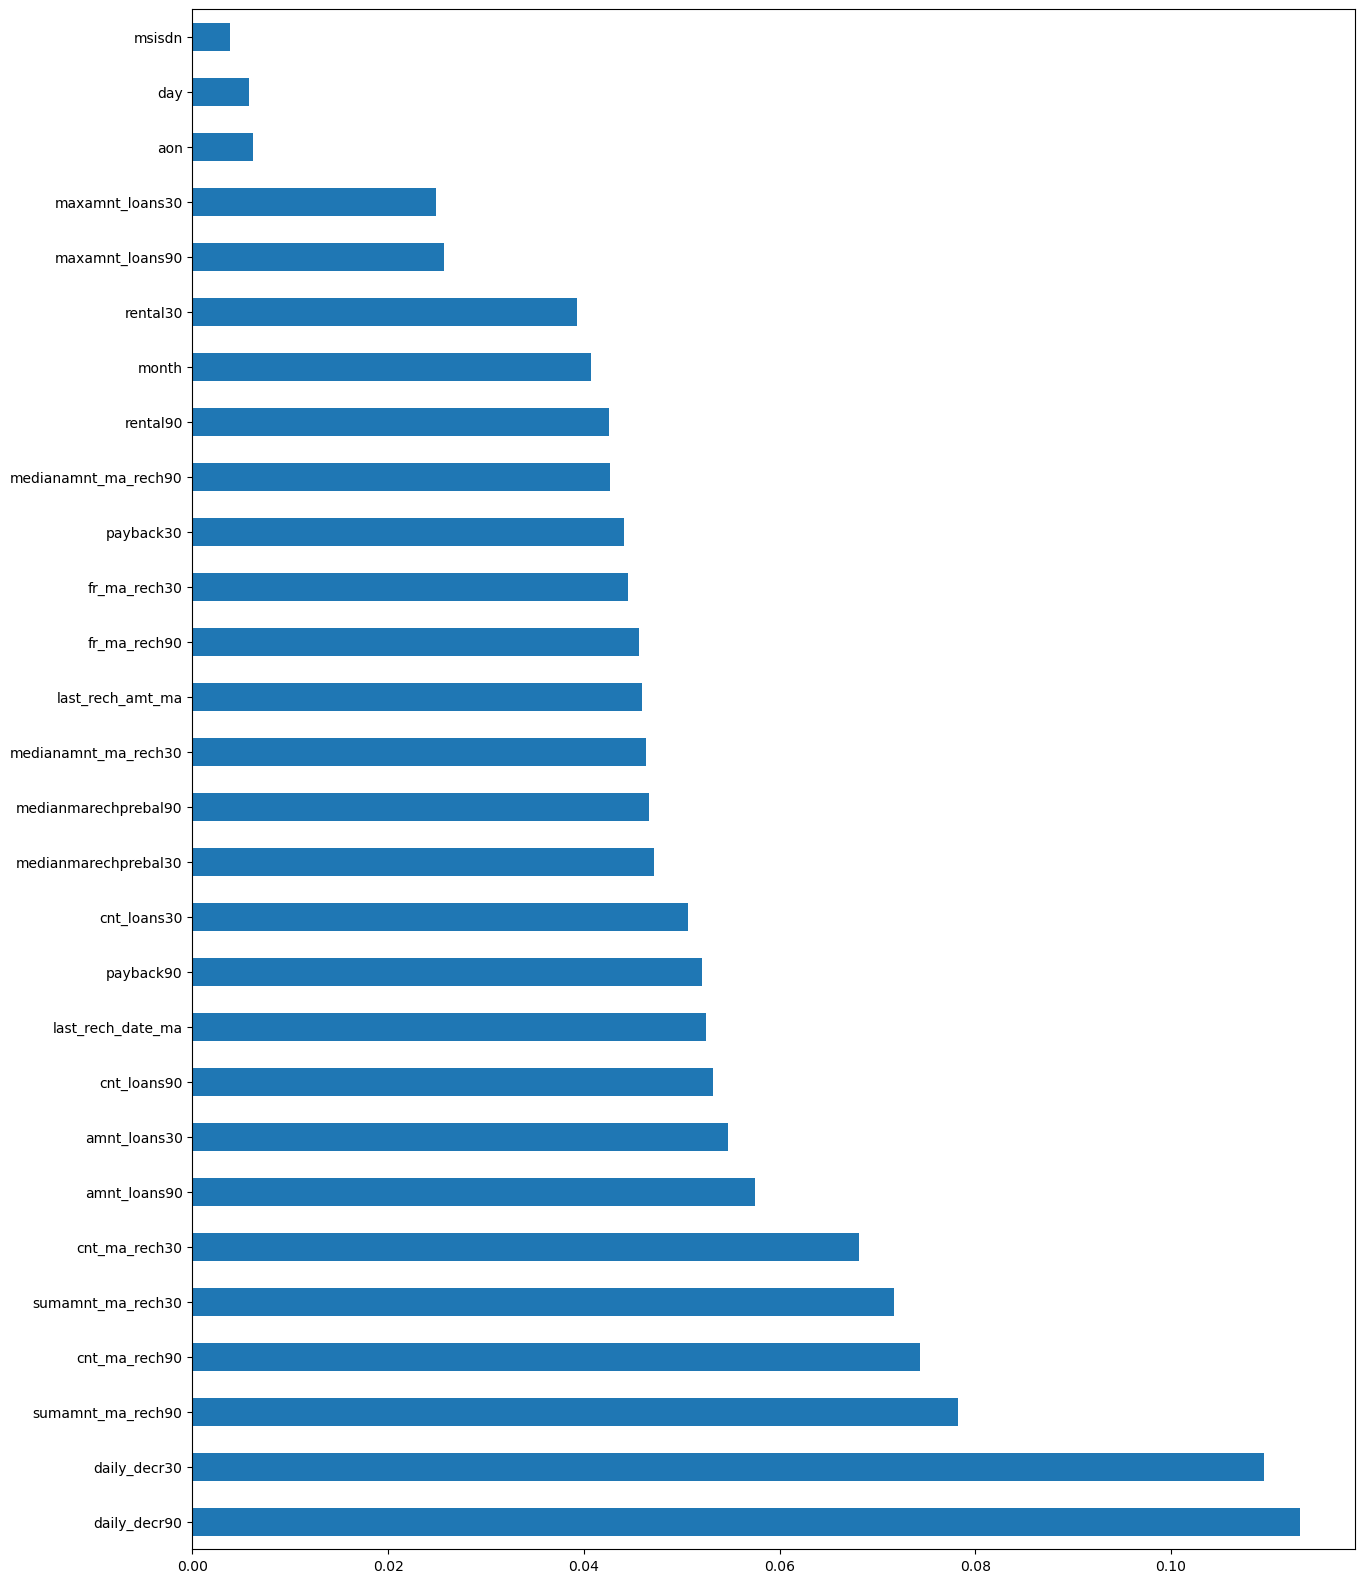

In [526]:
mutual_info.sort_values(ascending=False).plot.barh(figsize=(15,20))

In [527]:
from sklearn.feature_selection import SelectKBest
sel_top_five = SelectKBest(mutual_info_classif, k=5)
sel_top_five.fit(x_train.fillna(0), y_train)
x_train.columns[sel_top_five.get_support()]

Index(['daily_decr30', 'daily_decr90', 'sumamnt_ma_rech30', 'cnt_ma_rech90', 'sumamnt_ma_rech90'], dtype='object')

Thus these are the top features that is daily_decre30,daily_decre90,sumamnt_ma_rech90,sumamnt_ma_rech90,cnt_ma_rech90

# Skew Analysis

In [528]:
df.skew()

label                  -2.270254
msisdn                  0.000719
aon                     0.952374
daily_decr30            1.239238
rental30                1.215453
rental90                1.210361
last_rech_date_ma       1.133958
last_rech_amt_ma        1.003446
cnt_ma_rech30           0.904157
fr_ma_rech30            1.253282
sumamnt_ma_rech30       1.080771
medianamnt_ma_rech30    0.728219
medianmarechprebal30    1.105328
cnt_ma_rech90           0.934789
fr_ma_rech90            1.172479
sumamnt_ma_rech90       1.126421
medianamnt_ma_rech90    0.763904
medianmarechprebal90    1.083476
cnt_loans30             1.340348
maxamnt_loans30         1.241879
amnt_loans90            1.217940
maxamnt_loans90         0.000000
payback30               1.189312
payback90               1.170815
month                  -0.343242
day                     0.199845
dtype: float64

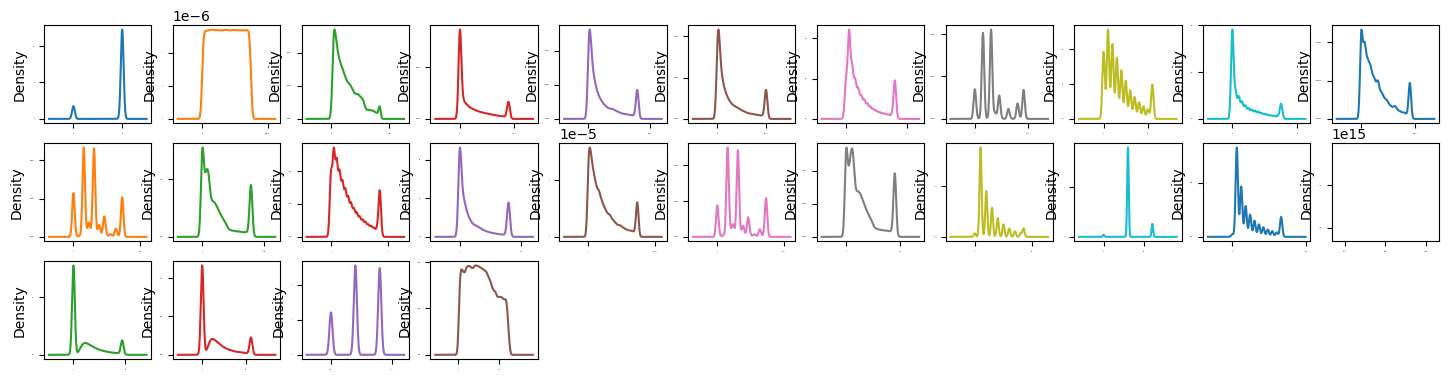

In [529]:
df.plot(kind="density",subplots=True,layout=(8,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Thus we see that almost all the columns are right skewed and are not following normal distribution curve. 

### Treating skewness

In [530]:
#using log transform as most of them are positively skewed
for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

label                  -2.270254
msisdn                  0.000719
aon                    -0.586812
daily_decr30           -0.487377
rental30               -1.384962
rental90               -1.337163
last_rech_date_ma       0.089343
last_rech_amt_ma       -2.320883
cnt_ma_rech30          -0.217408
fr_ma_rech30            0.304198
sumamnt_ma_rech30      -1.801909
medianamnt_ma_rech30   -1.971108
medianmarechprebal30   -0.774898
cnt_ma_rech90          -0.258108
fr_ma_rech90            0.259155
sumamnt_ma_rech90      -2.079889
medianamnt_ma_rech90   -2.385929
medianmarechprebal90   -0.960687
cnt_loans30             0.499941
maxamnt_loans30        -3.101331
amnt_loans90           -0.009343
maxamnt_loans90         0.000000
payback30               0.457016
payback90               0.318596
month                  -0.343242
day                     0.199845
dtype: float64

### Feature Scaling

In [531]:
#Scaling the dataset using StandrardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.984213  , -0.77283808, -0.24116666, ...,  2.30030123,
        -0.27336037,  0.6637208 ],
       [ 0.91502744,  0.08398611,  1.30626286, ..., -0.79673735,
        -1.62209905, -0.52127058],
       [-1.10692885, -0.2606909 , -0.52397049, ..., -0.79673735,
        -1.62209905,  0.54522166],
       ...,
       [-0.7274342 ,  0.67013174,  1.25866582, ...,  0.25854987,
        -0.27336037,  1.73021304],
       [ 0.34017702,  2.07026035,  1.36876597, ...,  2.09383199,
        -0.27336037,  1.25621649],
       [ 0.52386948,  1.77621387,  0.00362312, ..., -0.79673735,
        -0.27336037, -0.87676799]])

# Oversampling

In [532]:
# Oversampling the data by adding samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

SMOTE is the oversampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [533]:
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

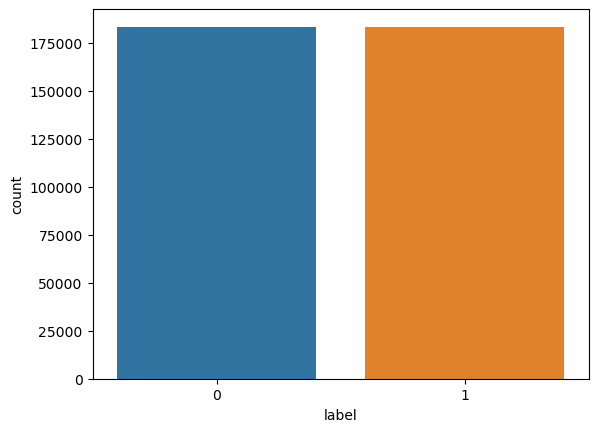

In [534]:
sns.countplot(y) #visually validating the label now its balanced after applying smote.

# Finding best random state 

In [535]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lg =  LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7747935198393588  on Random_state  142


### Training and testing data sets

In [536]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=142)

### Building Machine Learning Models and evaluation metrics

### Models :
We are going to use LogisticRegression,DecisionTreeClassifier for finding out the best model among those. Also we will use Ensemble Techniques like RandomForest, Adaboost and GradientBoosting algorithms to find the best performing model .
### Evaluation metric:
classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score,cross_val_score.

In [537]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [538]:
#Model 1-Logistic Regression

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model1=LogisticRegression(random_state=142)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
scr=cross_val_score(model1,x,y,cv=5)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("The cross validation score of logistic Regression model is :",scr.mean())


[[44671 10410]
 [14376 40602]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     55081
           1       0.80      0.74      0.77     54978

    accuracy                           0.77    110059
   macro avg       0.78      0.77      0.77    110059
weighted avg       0.78      0.77      0.77    110059

The cross validation score of logistic Regression model is : 0.7720178241561382


In [539]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob = model1.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test,y_pred_prob[:,1])

ROC AUC = 0.8489835065817359


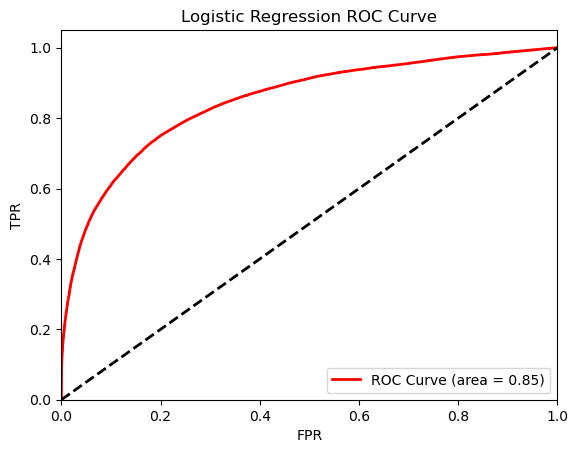

In [540]:
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [541]:
#Model 2-Decision Tree Classifier

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model2=DecisionTreeClassifier(random_state=142)
model2.fit(x_train,y_train)
y_pred1=model2.predict(x_test)
scr=cross_val_score(model2,x,y,cv=5)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("The cross validation score of Decision Tree Classifier model is :",scr.mean())


[[50503  4578]
 [ 5489 49489]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     55081
           1       0.92      0.90      0.91     54978

    accuracy                           0.91    110059
   macro avg       0.91      0.91      0.91    110059
weighted avg       0.91      0.91      0.91    110059

The cross validation score of Decision Tree Classifier model is : 0.9076984313766255


In [542]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob = model2.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test,y_pred_prob[:,1])

ROC AUC = 0.9085230522920302


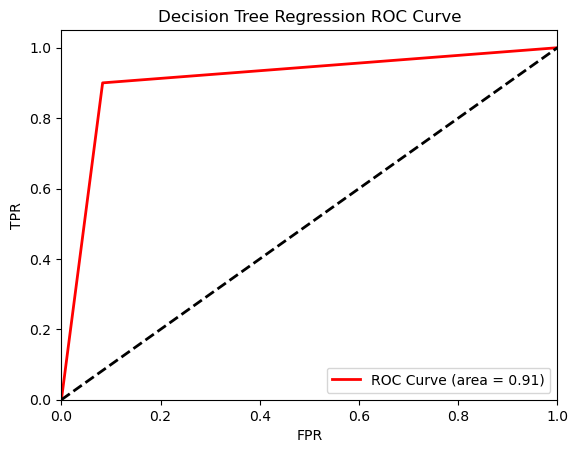

In [543]:
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [544]:
#Model 3-Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier(random_state=142)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
scr=cross_val_score(model3,x,y,cv=5)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("The cross validation score of Random Forest Classifier model is :",scr.mean())

[[52452  2629]
 [ 2734 52244]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     55081
           1       0.95      0.95      0.95     54978

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059

The cross validation score of Random Forest Classifier model is : 0.9471819457501063


In [545]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob = model3.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test,y_pred_prob[:,1])

ROC AUC = 0.9883943131479342


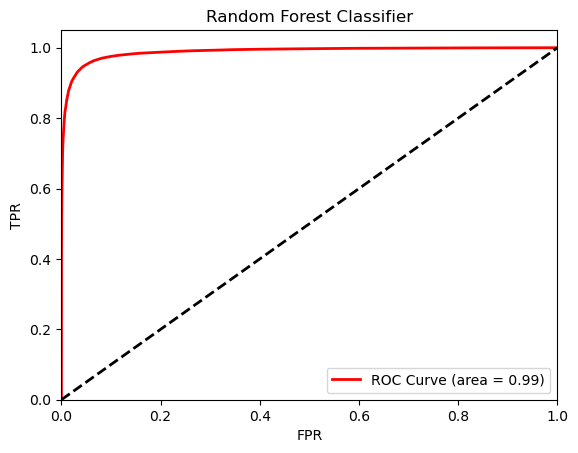

In [546]:
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [547]:
#Model 4-Ada Boost

from sklearn.ensemble import AdaBoostClassifier

model4=AdaBoostClassifier(random_state=142)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
scr=cross_val_score(model4,x,y,cv=5)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print("The cross validation score of AdaBoost Classifier model is :",scr.mean())

[[48395  6686]
 [ 8984 45994]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     55081
           1       0.87      0.84      0.85     54978

    accuracy                           0.86    110059
   macro avg       0.86      0.86      0.86    110059
weighted avg       0.86      0.86      0.86    110059

The cross validation score of AdaBoost Classifier model is : 0.8512275170500798


In [548]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob = model4.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test,y_pred_prob[:,1])

ROC AUC = 0.9353394544612169


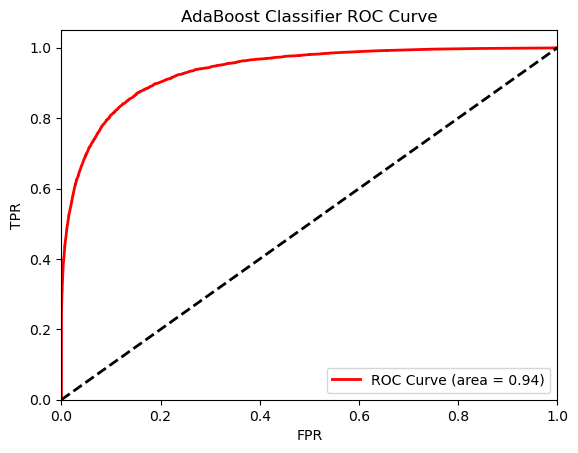

In [549]:
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AdaBoost Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [550]:
#Model 5- KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier(n_neighbors=20)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
scr=cross_val_score(model5,x,y,cv=5)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))
print("The cross validation score of KNeighbours Classifier model is :",scr.mean())

[[53085  1996]
 [16028 38950]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     55081
           1       0.95      0.71      0.81     54978

    accuracy                           0.84    110059
   macro avg       0.86      0.84      0.83    110059
weighted avg       0.86      0.84      0.83    110059

The cross validation score of KNeighbours Classifier model is : 0.8407466855060349


In [551]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob = model5.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test,y_pred_prob[:,1])

ROC AUC = 0.9295823368042295


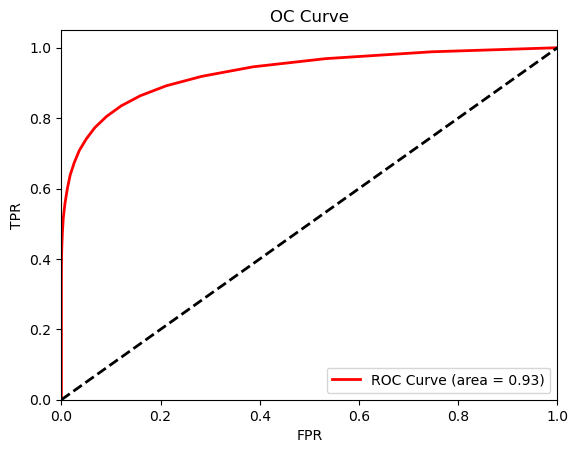

In [552]:
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('OC Curve')
plt.legend(loc='lower right')
plt.show()

We can see that Random Forest Classifier algorithm is performing well compared to other algorithms, as it is giving an accuracy score of 95 and cross validation score of 95% which is almost same. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

# Hyperparameter Tuning

I have used 4 Random Forest Classifier parameters which will be used in RandomizedSearchCV for finding the best output.

In [553]:
from sklearn.model_selection import RandomizedSearchCV
#creating parameter list to pass in RandomizedSearchCV
parameters= {'n_estimators': [100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [554]:
RCV=RandomizedSearchCV(RandomForestClassifier(),parameters,cv=5,n_iter =10)

In [555]:
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 150]})

In [190]:
RCV.best_params_

{'n_estimators': 150,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'gini'}

In [556]:
# Creating final model 
final_model = RandomForestClassifier(max_features="sqrt", max_depth=6,criterion='gini',n_estimators=150)
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score for the Best Model is:", acc_score*100)

Accuracy score for the Best Model is: 83.68602295132611


In [193]:
print('Cross validation score: ',cross_val_score(final_model,x,y,cv=5,scoring='accuracy').mean()*100)

Cross validation score:  82.59591328531327


# Confusion Matrix

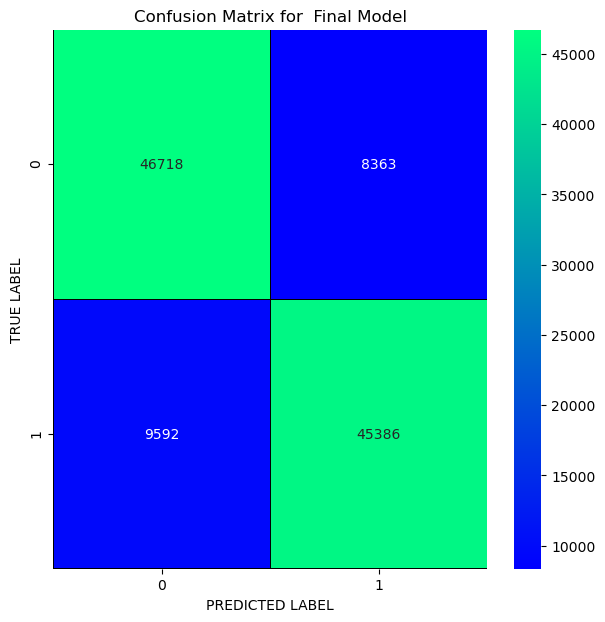

In [557]:
# Lets plot confusion matrix for  FinalModel
confus = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(confus, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="winter",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting ROC_AUC for the Final Model

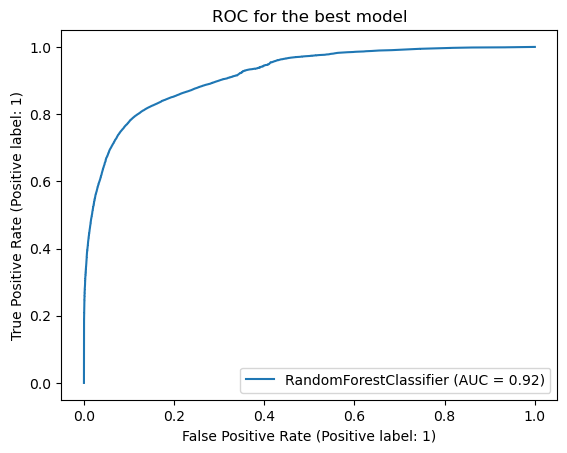

In [558]:
# Let's check the Auc for the best model after hyper parameter tuning
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving The Model

In [565]:
# Saving the model using joblib
import joblib
joblib.dump(final_model,"MicroCreditLoan_Defaulter.pkl")

['MicroCreditLoan_Defaulter.pkl']

# CONCLUSION: Prediction Test

In [566]:
# Loading the saved model
loaded_model=joblib.load("MicroCreditLoan_Defaulter.pkl")

#Prediction
prediction = loaded_model.predict(x_test)
prediction

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [567]:
# Creating dataframe for predicted results
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

0       1       2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      33      34      35      36      37      38      39      40      41      42      43      44      45      46      47      48      49      50      51      52      53      54      55      56      57      58      59      60      61      62      63      64      65      66      67      68      69      70      71      72      73      74      75      76      77      78      79      80      81      82      83      84      85      86      87      88      89      90      91      92      93      94      95      96      97      98      99      100     101     102     103     104     105     106     107     108     109     110     111     112     113     114     115     116     117     118     119     120     121     122     123     124     125     126     127     128     129     130     131     132     133     134     135     136     137     138     139     140     141     142     143     144     145     146     147     148     149     150     151     152     153     154     155     156     157     158     159     160     161     162     163     164     165     166     167     168     169     170     171     172     173     174     175     176     177     178     179     180     181     182     183     184     185     186     187     188     189     190     191     192     193     194     195     196     197     198     199     200     201     202     203     204     205     206     207     208     209     210     211     212     213     214     215     216     217     218     219     220     221     222     223     224     225     226     227     228     229     230     231     232     233     234     235     236     237     238     239     240     241     242     243     244     245     246     247     248     249     ...  109809  109810  109811  109812  109813  109814  109815  109816  109817  109818  109819  109820  109821  109822  109823  109824  109825  109826  109827  109828  109829  109830  109831  109832  109833  109834  109835  109836  109837  109838  109839  109840  109841  109842  109843  109844  109845  109846  109847  109848  109849  109850  109851  109852  109853  109854  109855  109856  109857  109858  109859  109860  109861  109862  109863  109864  109865  109866  109867  109868  109869  109870  109871  109872  109873  109874  109875  109876  109877  109878  109879  109880  109881  109882  109883  109884  109885  109886  109887  109888  109889  109890  109891  109892  109893  109894  109895  109896  109897  109898  109899  109900  109901  109902  109903  109904  109905  109906  109907  109908  109909  109910  109911  109912  109913  109914  109915  109916  109917  109918  109919  109920  109921  109922  109923  109924  109925  109926  109927  109928  109929  109930  109931  109932  109933  109934  109935  109936  109937  109938  109939  109940  109941  109942  109943  109944  109945  109946  109947  109948  109949  109950  109951  109952  109953  109954  109955  109956  109957  109958  109959  109960  109961  109962  109963  109964  109965  109966  109967  109968  109969  109970  109971  109972  109973  109974  109975  109976  109977  109978  109979  109980  109981  109982  109983  109984  109985  109986  109987  109988  109989  109990  109991  109992  109993  109994  109995  109996  109997  109998  109999  110000  110001  110002  110003  110004  110005  110006  110007  110008  110009  110010  110011  110012  110013  110014  110015  110016  110017  110018  110019  110020  110021  110022  110023  110024  110025  110026  110027  110028  110029  110030  110031  110032  110033  110034  110035  110036  110037  110038  110039  110040  110041  110042  110043  110044  110045  110046  110047  110048  110049  110050  110051  110052  110053  110054  110055  110056  110057  110

# Concluding Remarks

CONCLUDING REMARKS:
The objective of the case was to create a predictive model which will predict whether the user will default or not.This will also help the management to understand how exactly the target label is influenced by other factors. So first I started with loading the dataset and carry out data analysis and then did the EDA process with visualization patterns using pie-plot, box plot, distribution plot ,boxplot and learnt about different relationship between the features and target variable.

After that I did pre-processing techniques like checking outliers, removal of skewness, encoding of categorical column, handling multicollinearity using Pearson correlation technique and find out the most important features using mutual information gain and selectPercentile with respect to target variable and finally scaling of data for standardization.

Then I did the model training, building the model and finding out the best model out of several classification models on the basis of different evaluation metrices scores like accuracy score,cross validation,f1,confusion matrix,auc_roc plotetc.

We find that Random Forest Classifier model was the best fitted model as it was having high accurcay and high cross validation score among other models .I did cross validation to reduce overfitting problem.Then I did hypertunning through RandomizedSearchCv on best model taking the parameters to improve the score. As the score was bit less which means that it may have reduced the overfitting problem. Thus concluded that Random Forest model was performing well than other Model.

Thus finally concluding saying that Random Forest model was having the highest precision accuracy for prediction of loan deliqunecy with machine learning data. Hence by implementation of this model company can strategise the plans for investment and improvemnt in the selection of customers and concentrate on areas that will yield high returns in short duration of time and limited manual intervention.

I saved the best model using joblib method and loaded the model for prediction test. Thus this model can be used in further deployment process.

Overall, this dataset is good for predicting the loan deliquency based on classification problem using Random Forest Classifier as the best suited model.